In [68]:
import os
from classy import Class
import numpy as np
from scipy import interpolate
from matplotlib import pyplot as plt
import glob

from ap_approx_aniso import ClassApproxAniso

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['text.usetex'] = True

In [2]:
cosmos = np.load(f"/home/rneveux/bispectrum/theory/cosmologies/lnAs/eft_cosmologies_noDQ1.npy")

In [3]:
print(np.min(cosmos, axis=0))
print(np.max(cosmos, axis=0))

[0.10121926 0.02066472 0.57451438 2.77885117 0.90120542]
[0.13999676 0.02427991 0.74766042 3.32142323 1.02488991]


In [4]:
Om=[]
for i in range(len(cosmos)):
    Om.append((cosmos[i,0]+cosmos[i,1])/cosmos[i,2]**2)

In [5]:
print(np.min(Om))
print(np.max(Om))
print(np.mean(Om))

0.22101015652831715
0.4926988137546725
0.33301783207689184


In [6]:
pk0_ez = []
pk2_ez = []
pk4_ez = []
for i in range(1000):
    pk0_ez.append(np.loadtxt(glob.glob(f'/home/swang/share/rneveux/FirstGenMocks_EZmock/CubicBox/LRG/z0.800/stable/powspec/pk0_CubicBox_rsd_seed{i+1}_8966887_*')[0]))
    pk2_ez.append(np.loadtxt(glob.glob(f'/home/swang/share/rneveux/FirstGenMocks_EZmock/CubicBox/LRG/z0.800/stable/powspec/pk2_CubicBox_rsd_seed{i+1}_8966908_*')[0]))
    pk4_ez.append(np.loadtxt(glob.glob(f'/home/swang/share/rneveux/FirstGenMocks_EZmock/CubicBox/LRG/z0.800/stable/powspec/pk4_CubicBox_rsd_seed{i+1}_8966913_*')[0]))  

In [33]:
std_pk0_kd = np.std(pk0_ez,axis=0)[:,3]
std_pk2_kd = np.std(pk2_ez,axis=0)[:,3]
std_pk4_kd = np.std(pk4_ez,axis=0)[:,3]
f_pk = interpolate.interp1d(pk0_ez[0][:,0], std_pk0_kd, fill_value="extrapolate", kind="cubic")
std_pk0 = f_pk(np.arange(.005,.3025,0.0025))
f_pk = interpolate.interp1d(pk0_ez[0][:,0], std_pk2_kd, fill_value="extrapolate", kind="cubic")
std_pk2 = f_pk(np.arange(.005,.3025,0.0025))
f_pk = interpolate.interp1d(pk0_ez[0][:,0], std_pk4_kd, fill_value="extrapolate", kind="cubic")
std_pk4 = f_pk(np.arange(.005,.3025,0.0025))

In [16]:
pk0_ez[0][:,1]

array([0.01159058, 0.02081665, 0.03048062, 0.04036437, 0.05036595,
       0.06034213, 0.07032078, 0.08025765, 0.09019841, 0.10017723,
       0.11014627, 0.12013268, 0.13012506, 0.14012919, 0.15012158,
       0.16013557, 0.1701332 , 0.18010434, 0.19009755, 0.20008652,
       0.21007385, 0.22008734, 0.23009189, 0.24006353, 0.25005338,
       0.26007668, 0.27008976, 0.28009345, 0.29006095, 0.30004239,
       0.31006239, 0.32007548, 0.3300729 , 0.34006375, 0.35004085,
       0.36004221, 0.37004509, 0.38004981, 0.39005857, 0.40006221])

In [9]:
dir_path = '/home/rneveux/bispectrum/theory/approx_epsilon/'

In [10]:
a = {f'{ell}_{ell_dash}_{n}':np.load(os.path.join(dir_path,f'{ell}/{ell_dash}/{n}.npy'), allow_pickle=True).item() for n in [0,1,2,3] for ell_dash in [0, 2, 4] for ell in [0,2,4]}

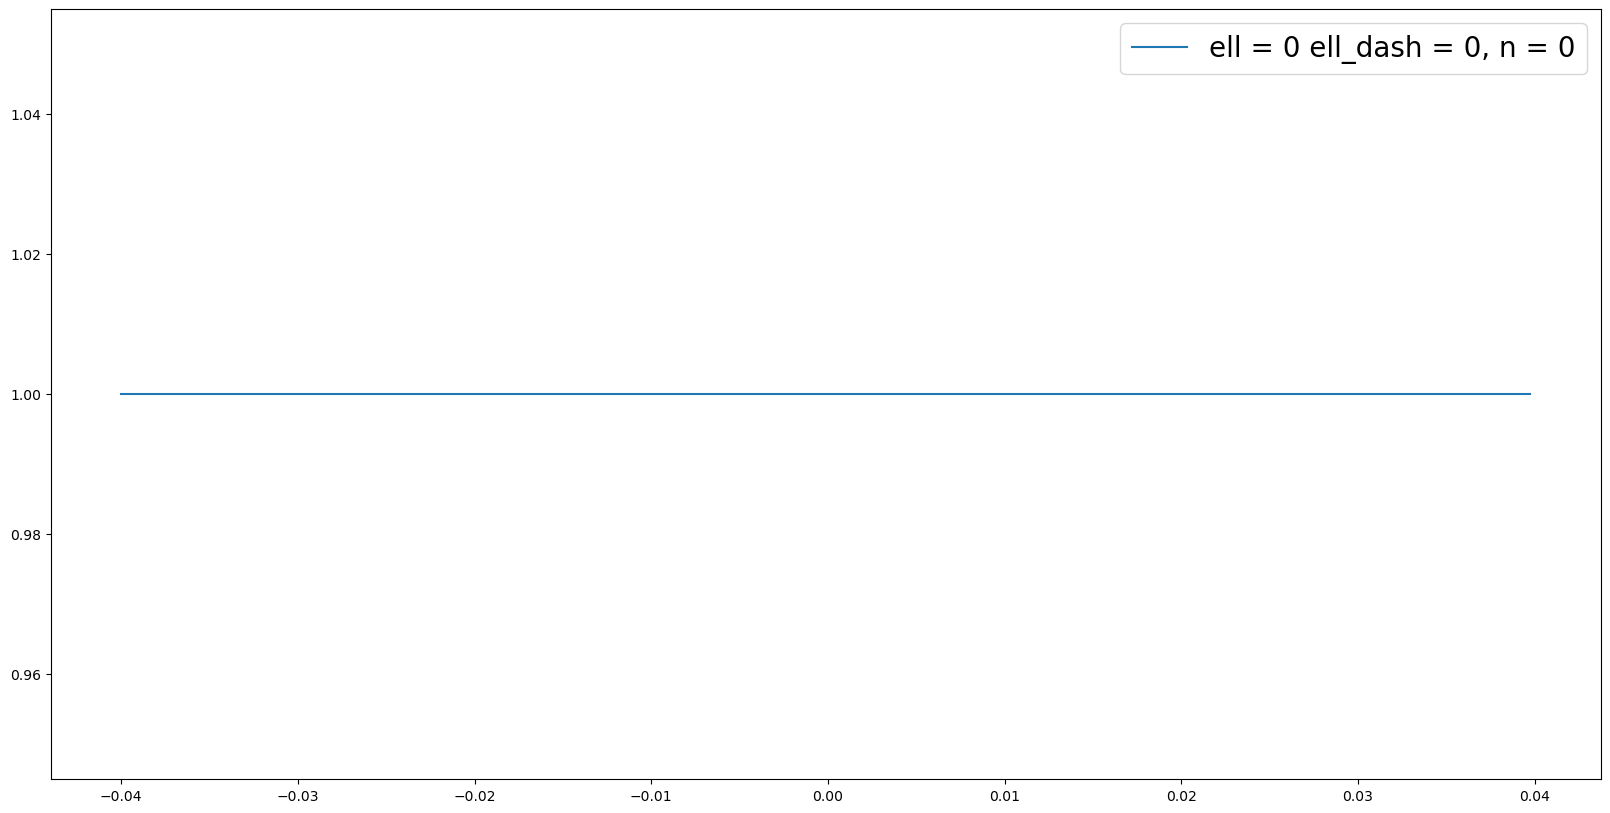

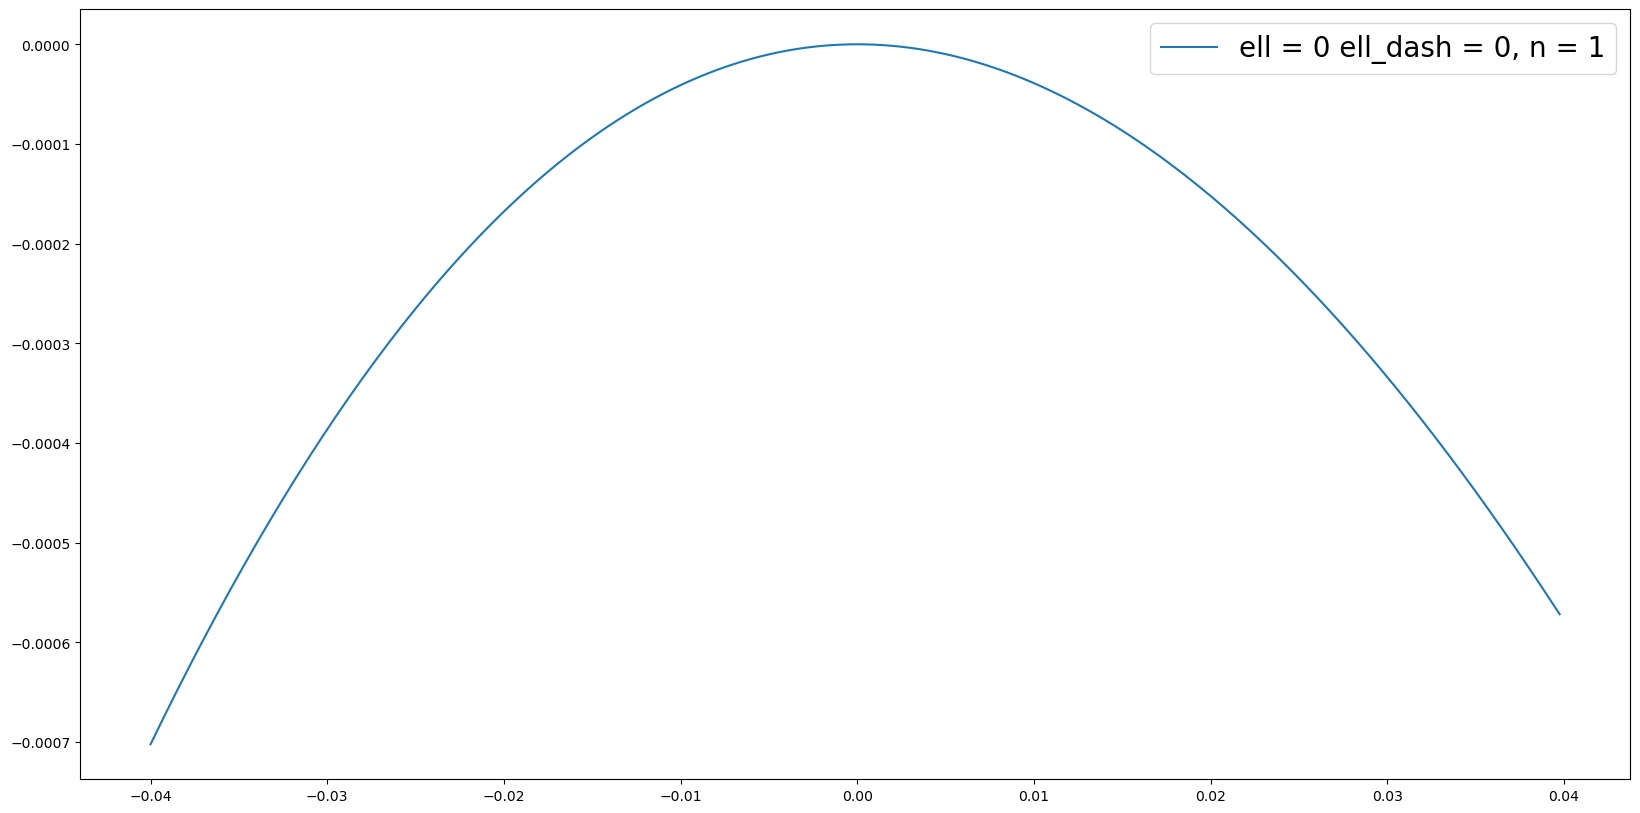

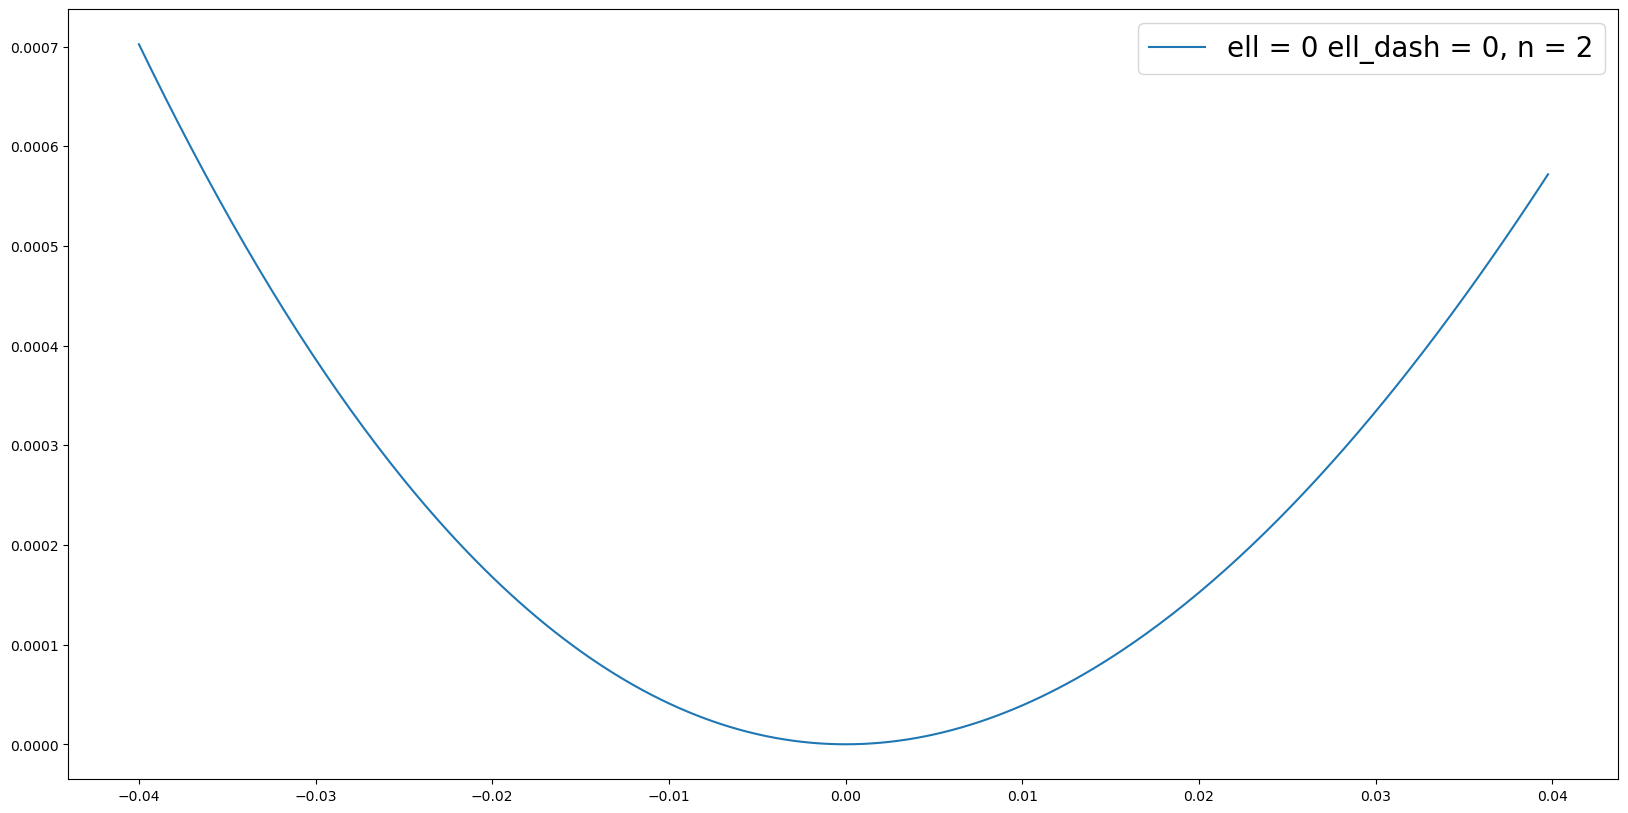

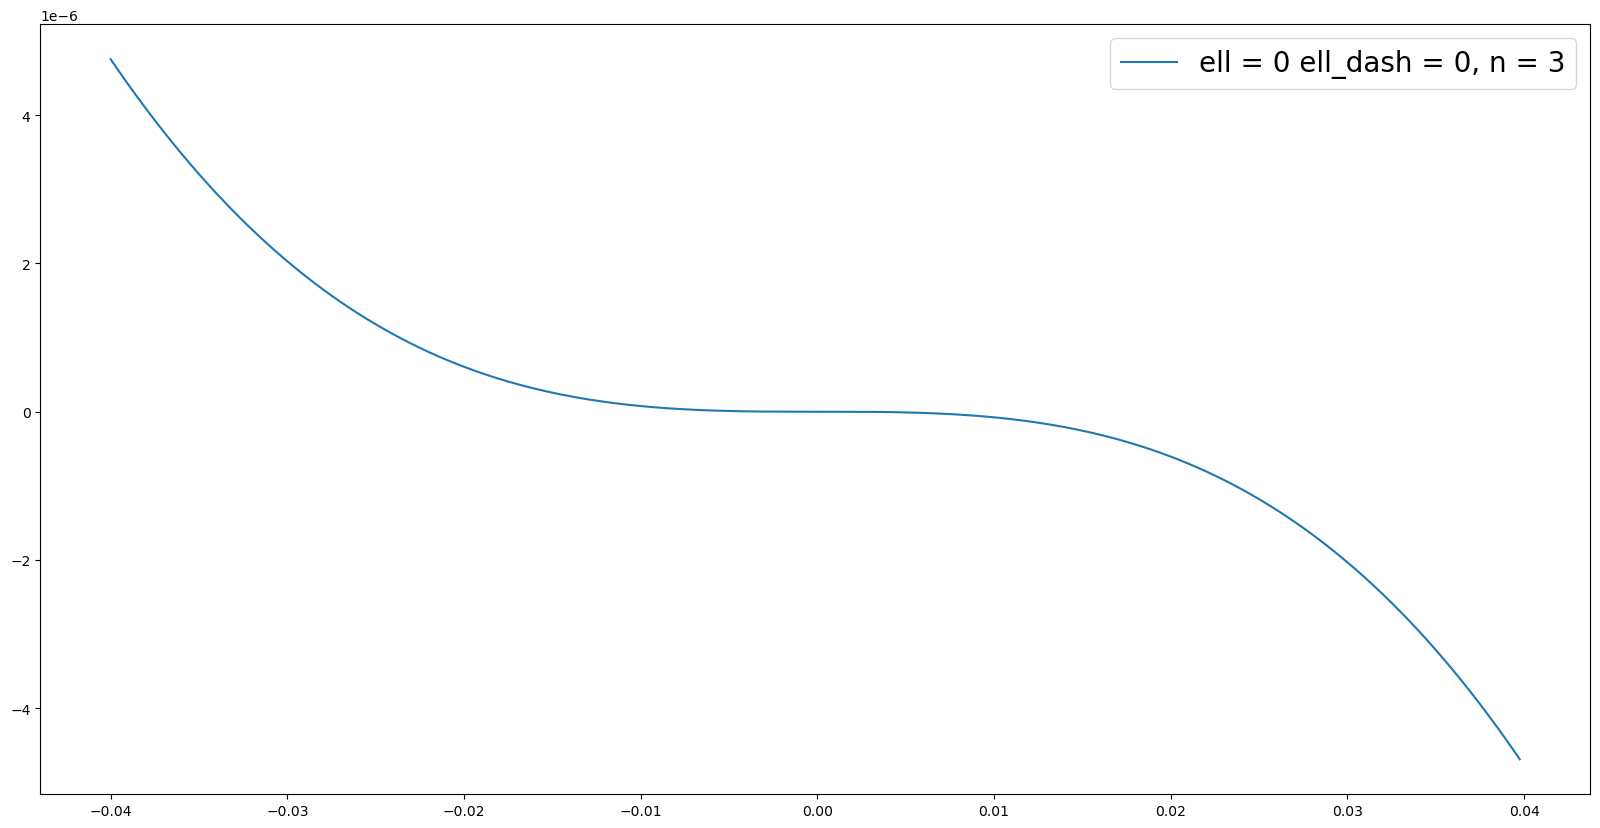

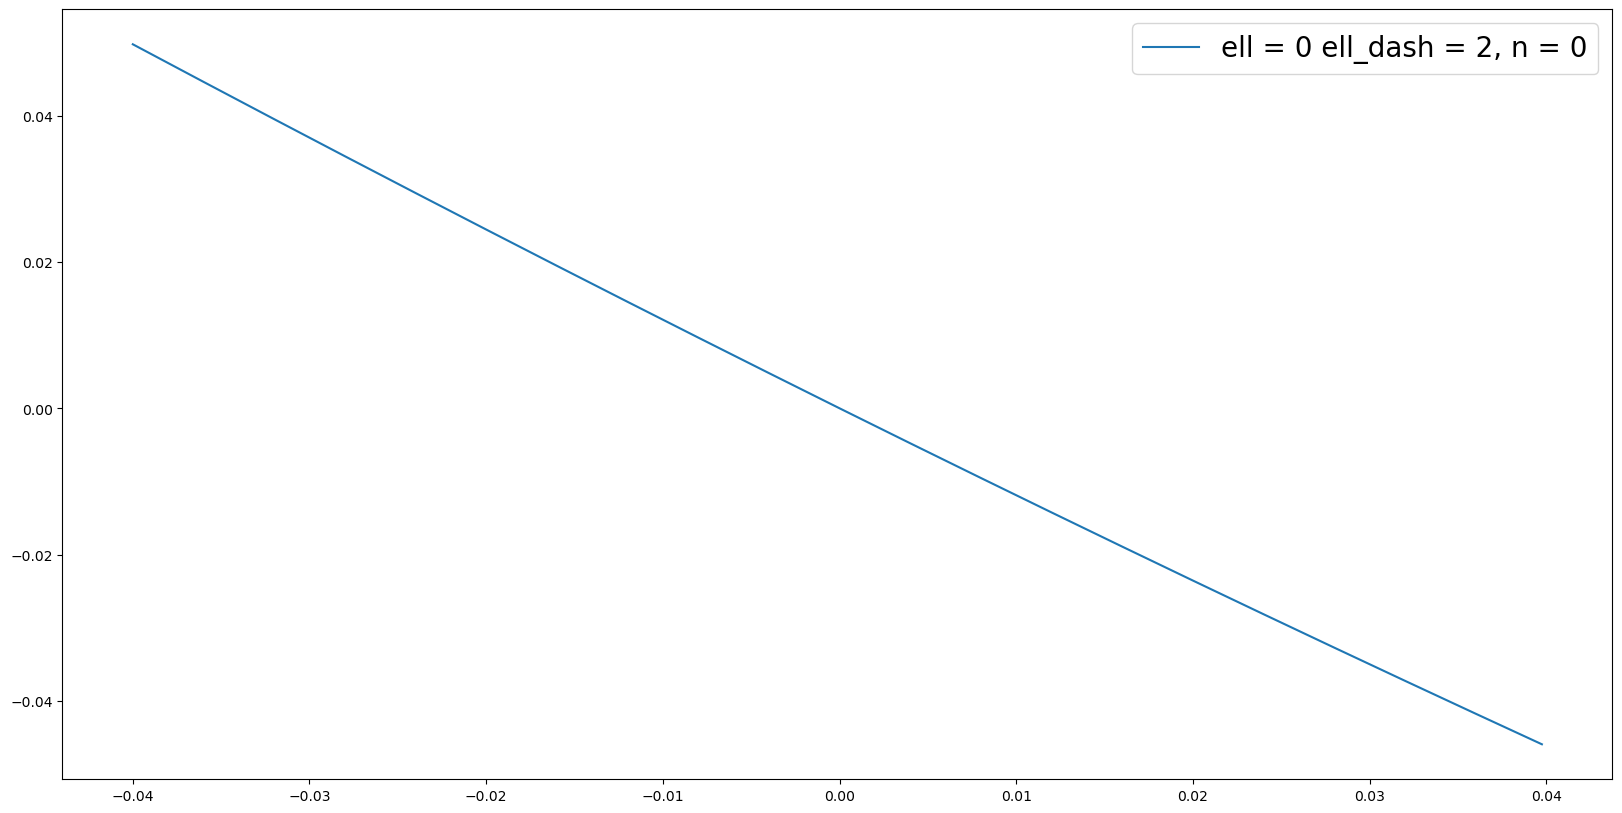

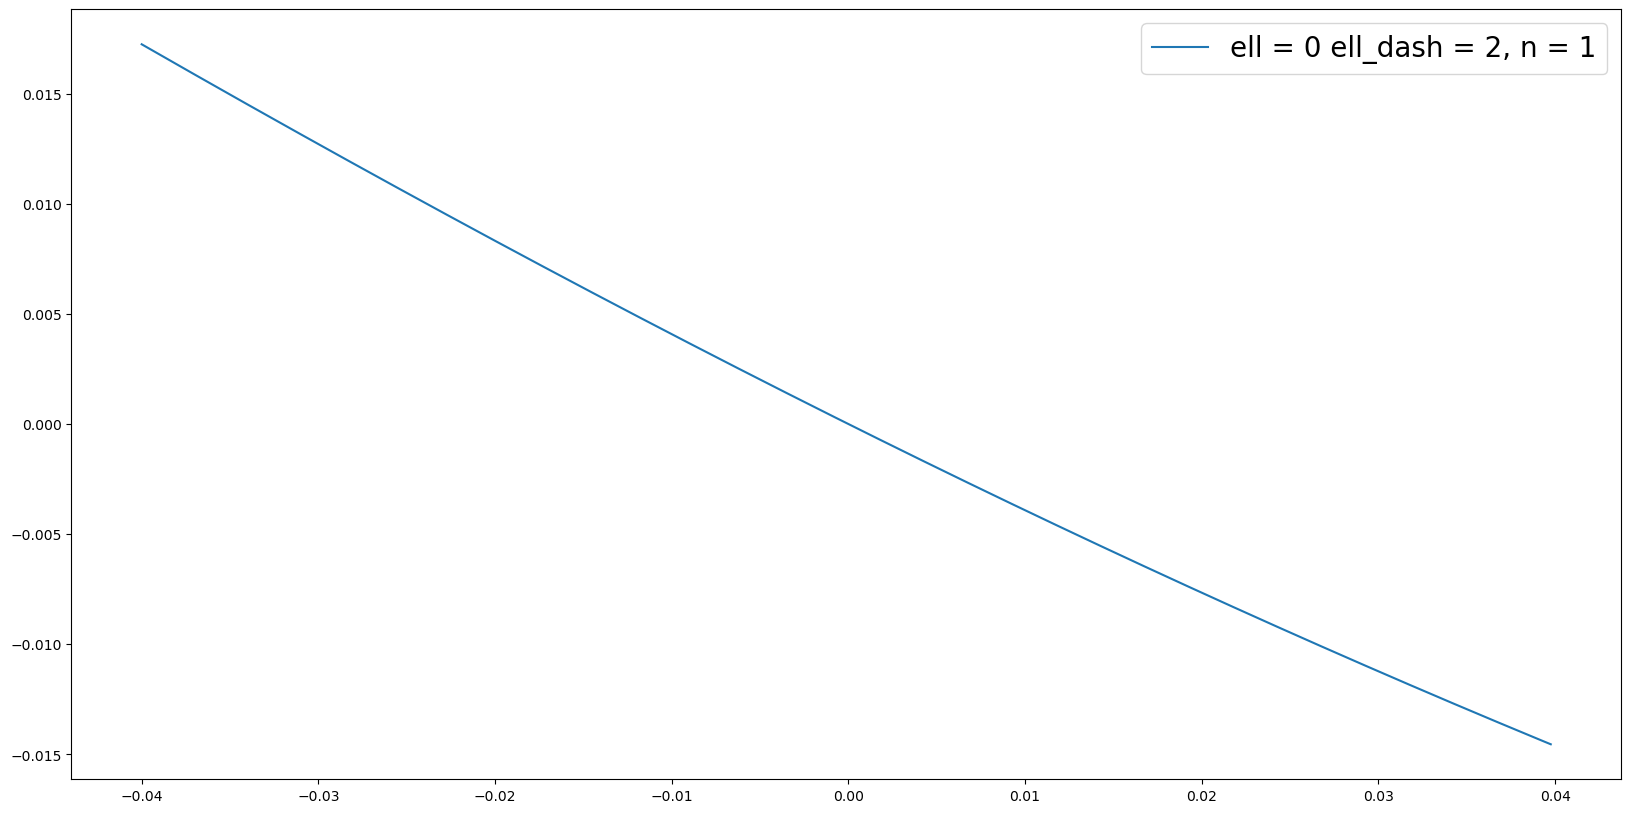

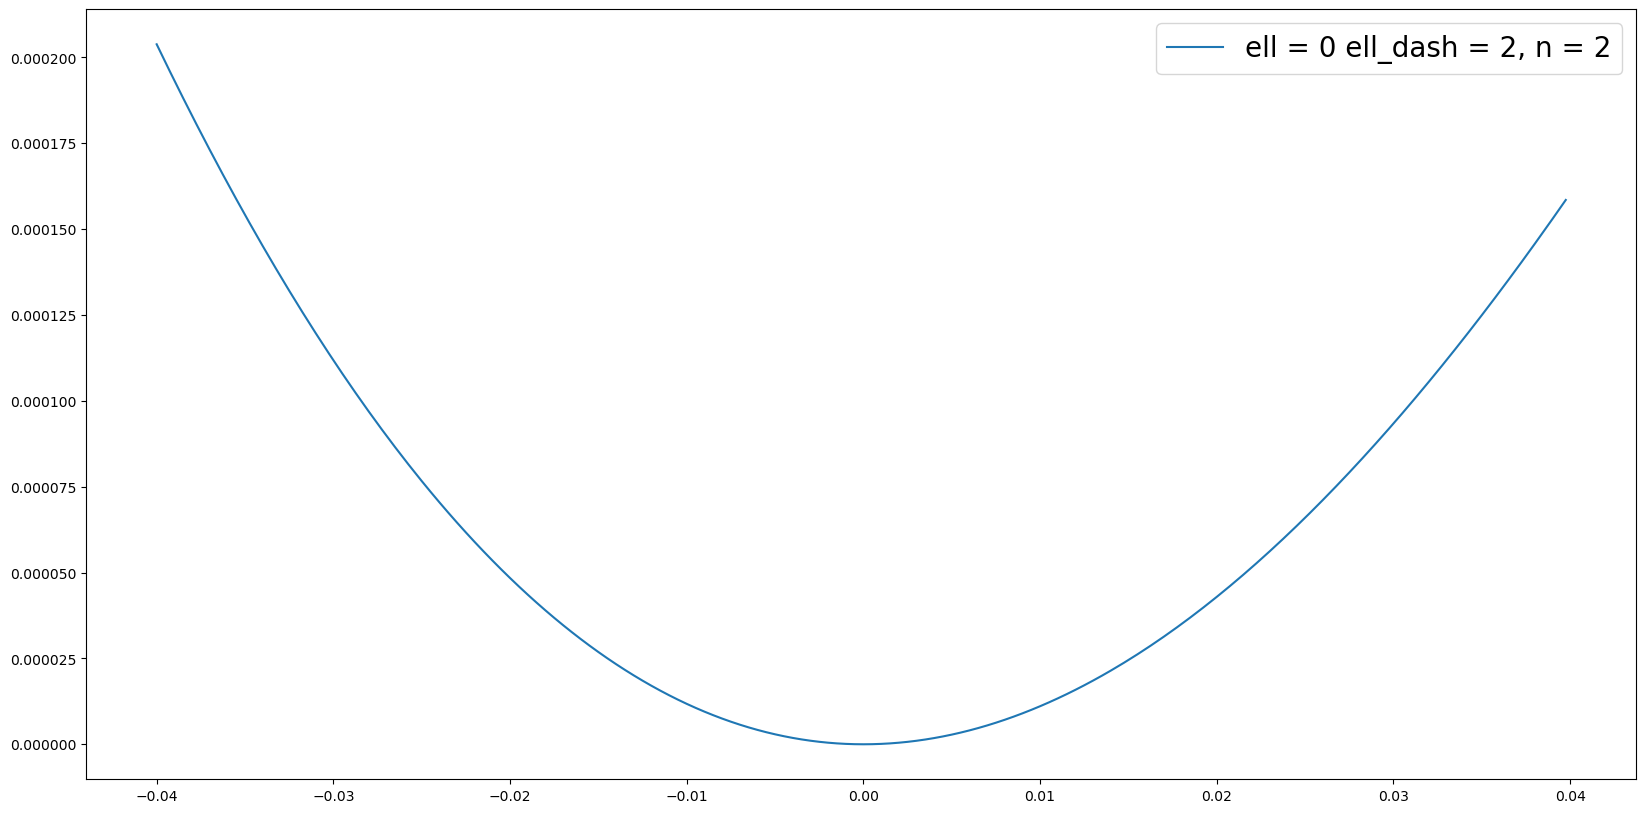

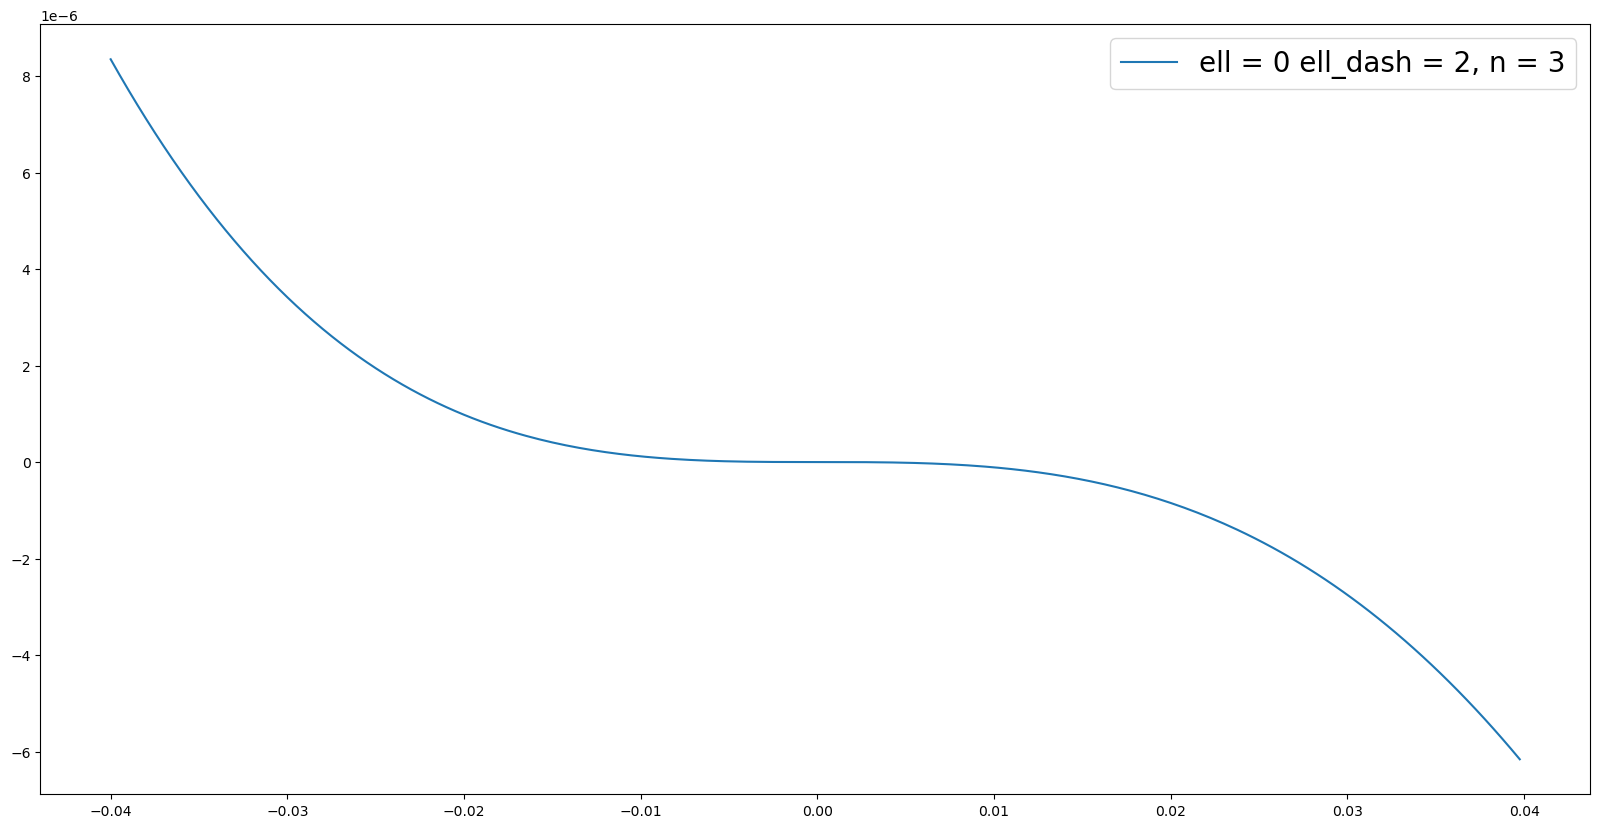

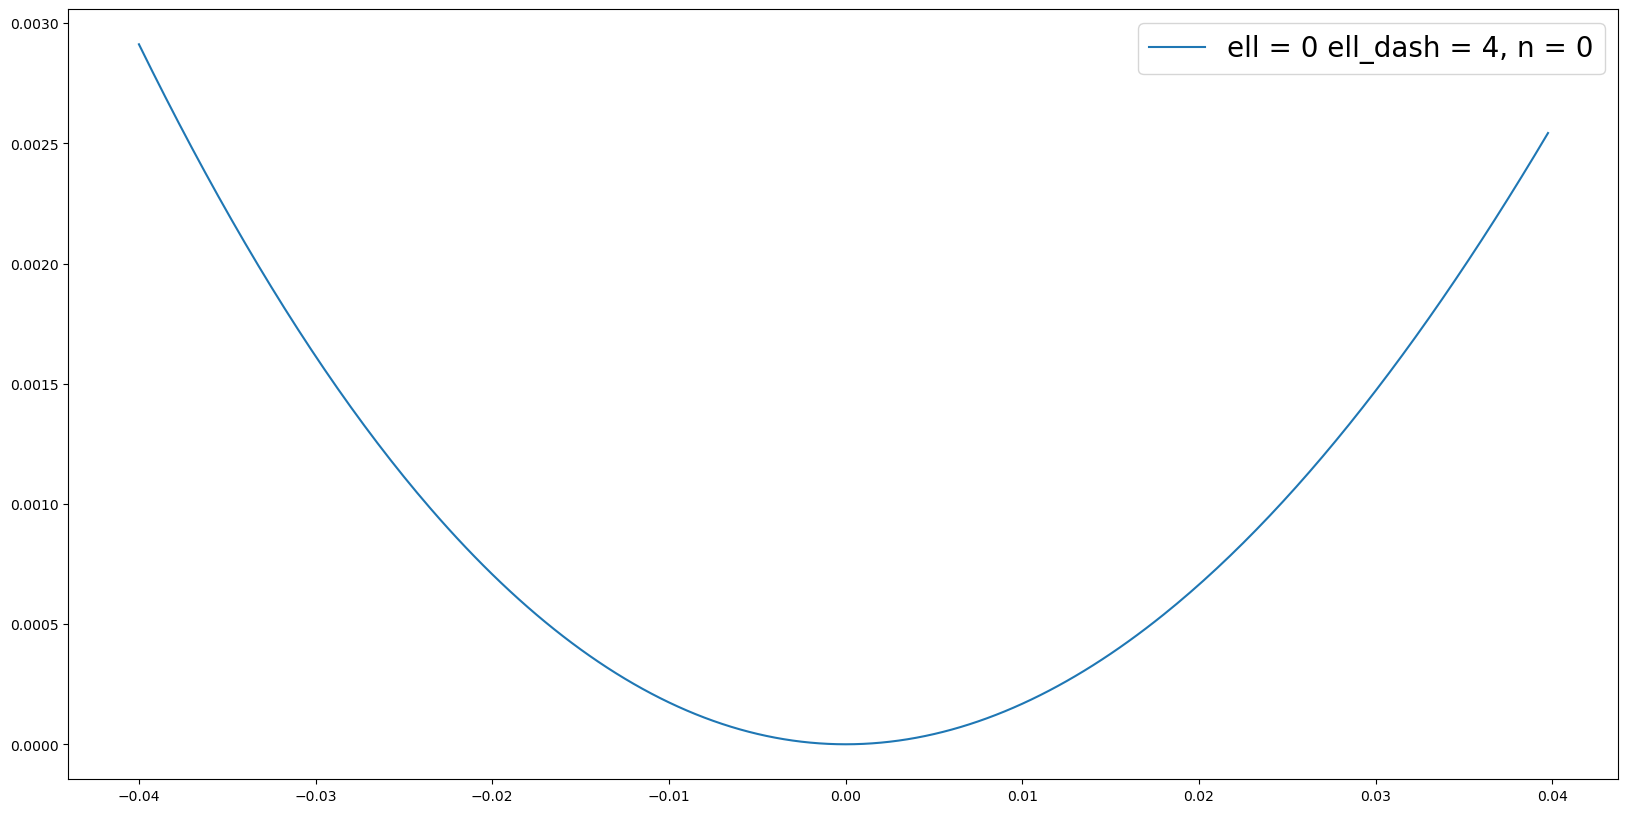

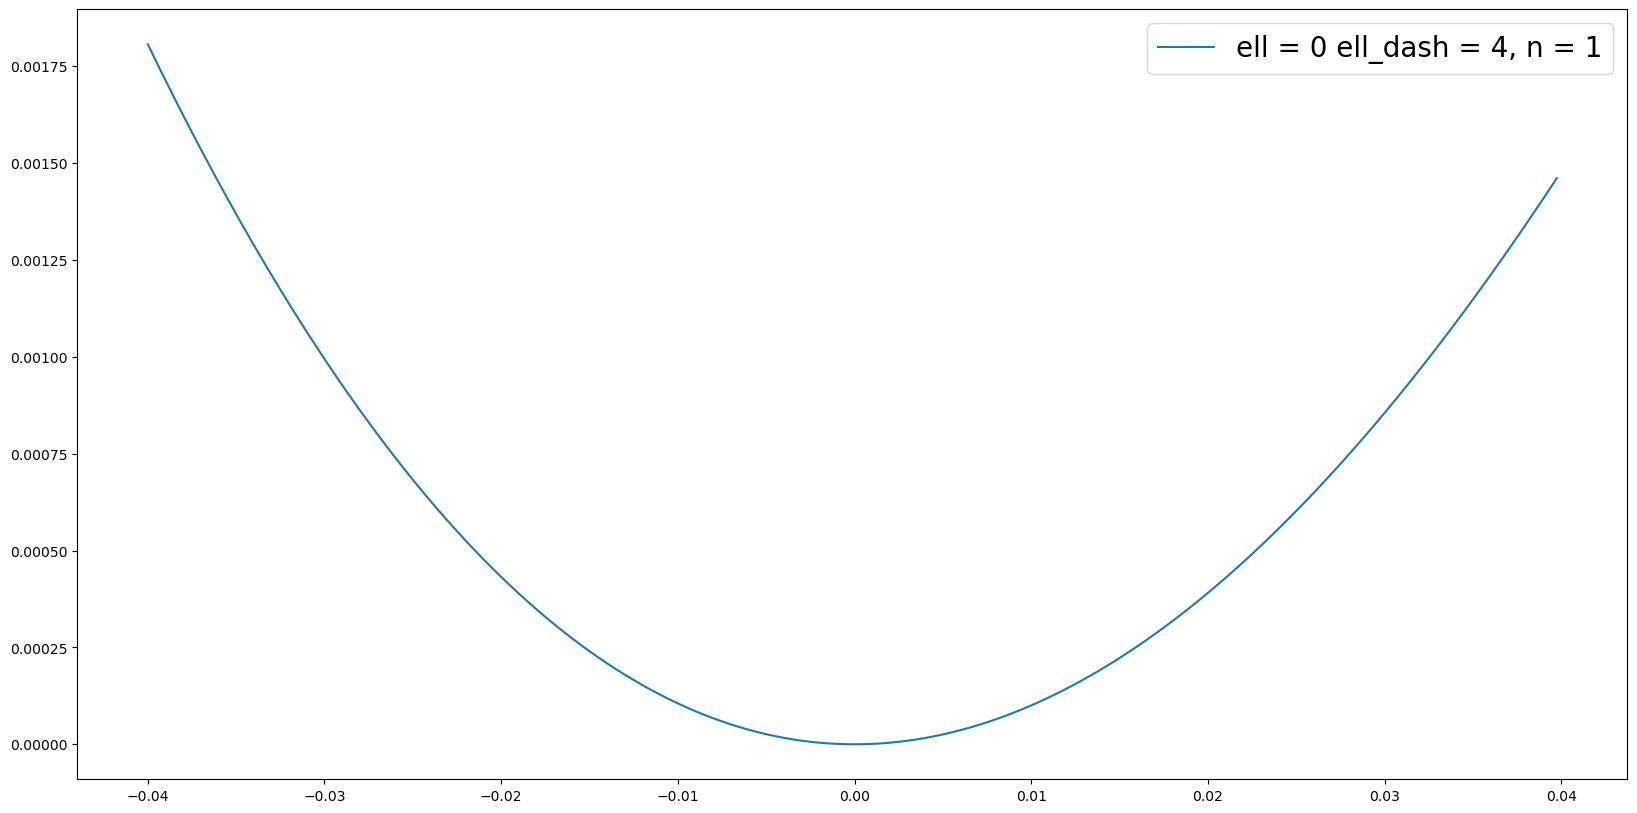

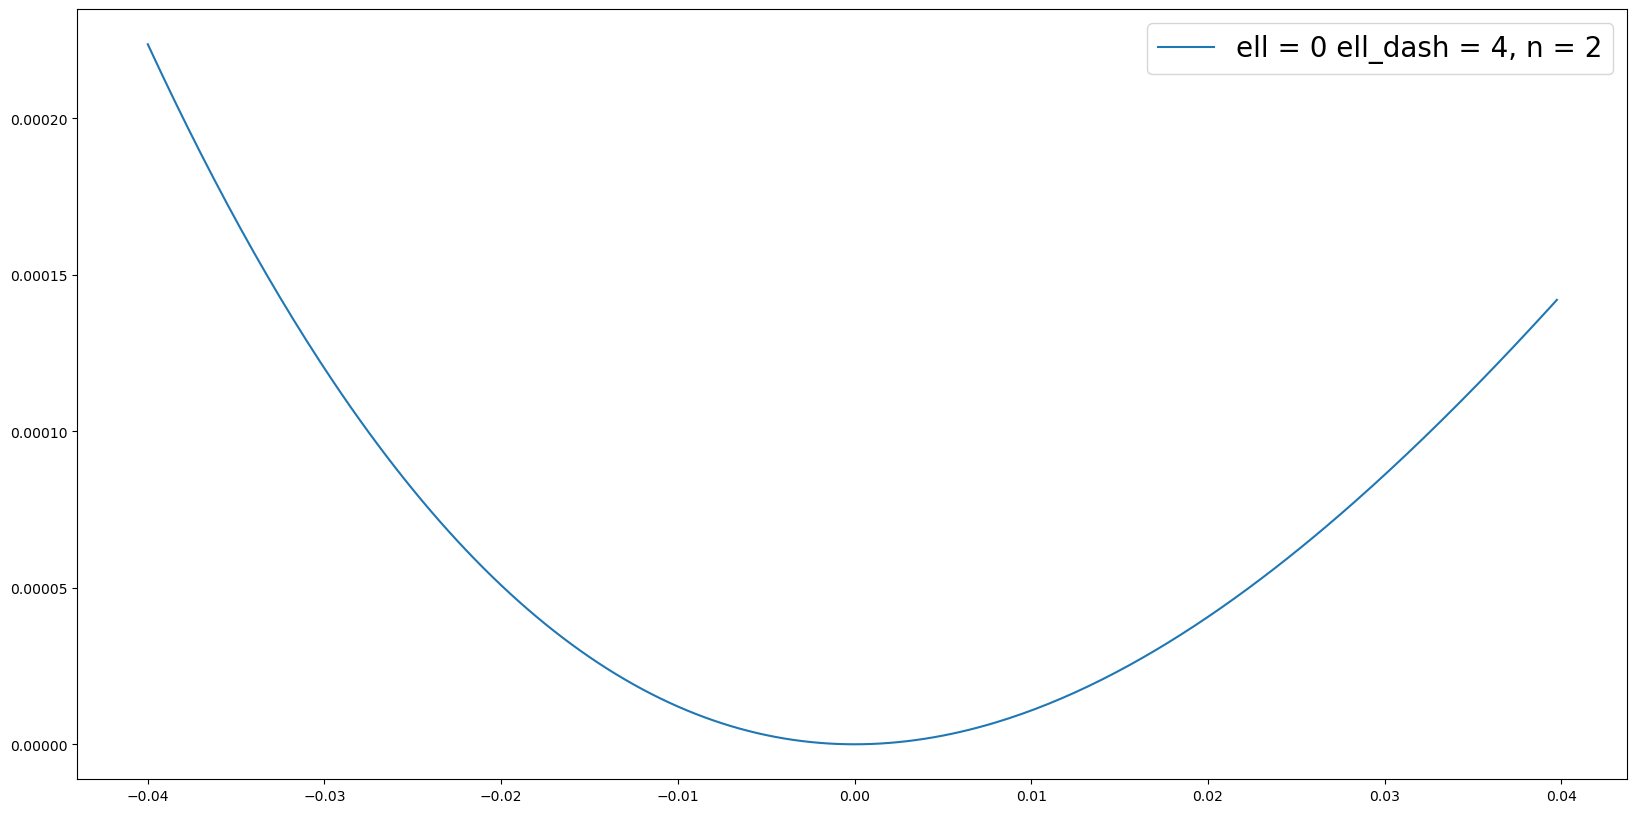

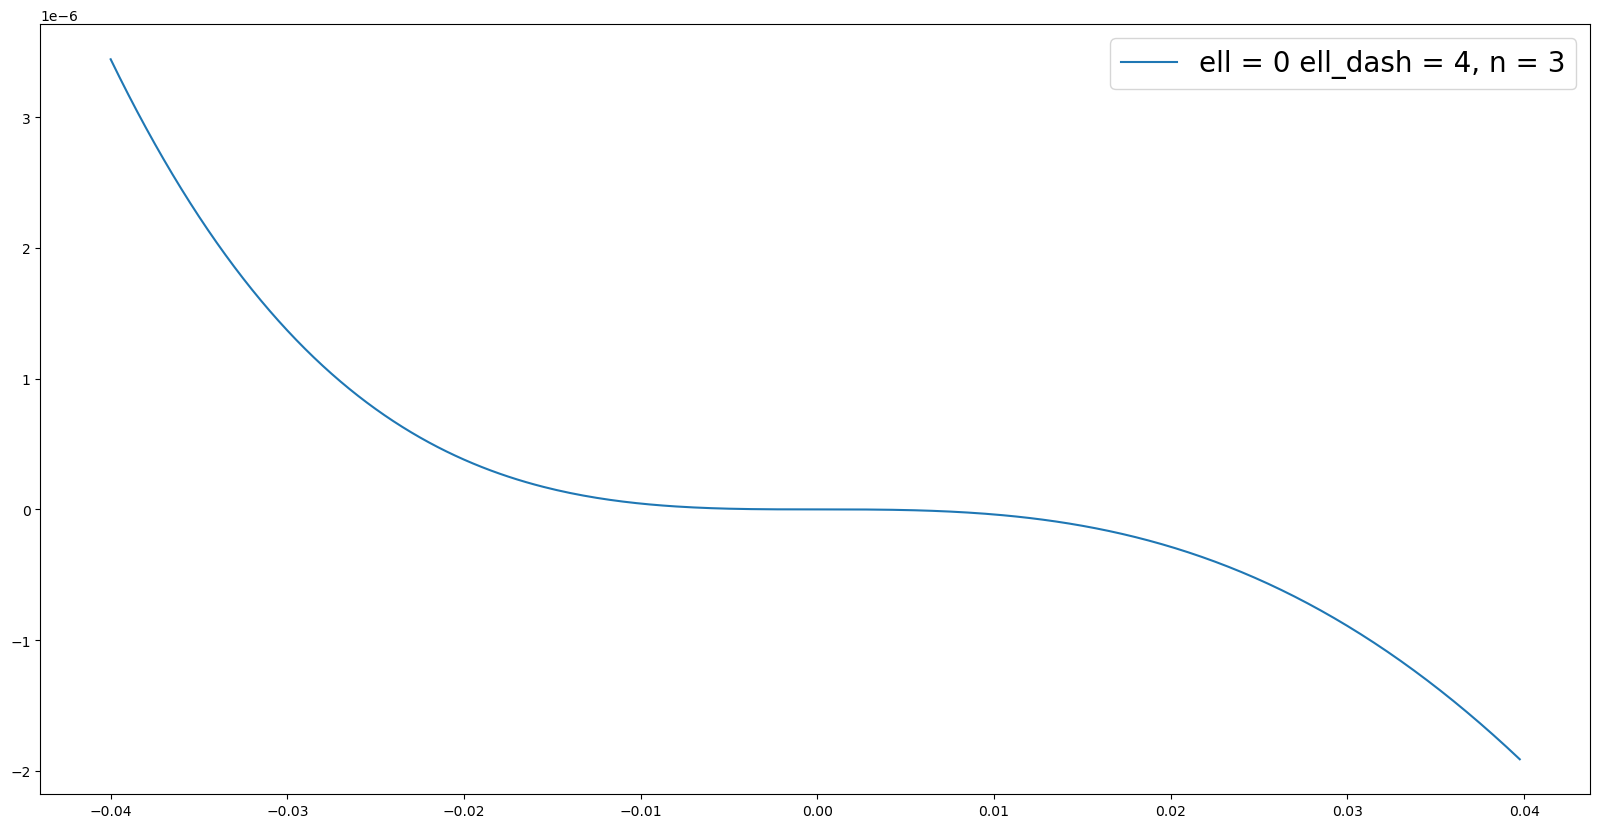

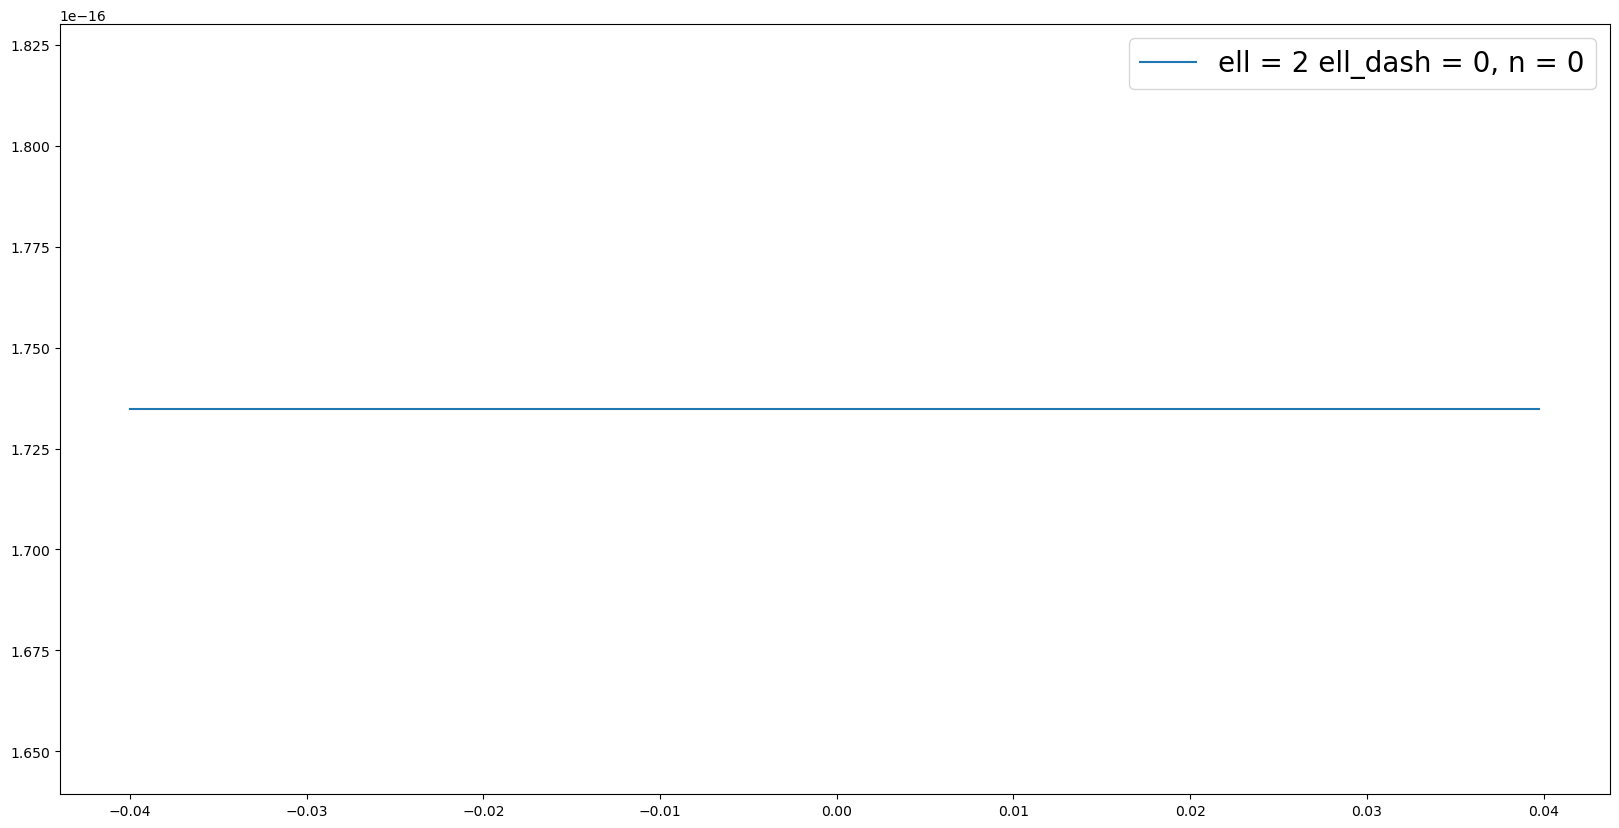

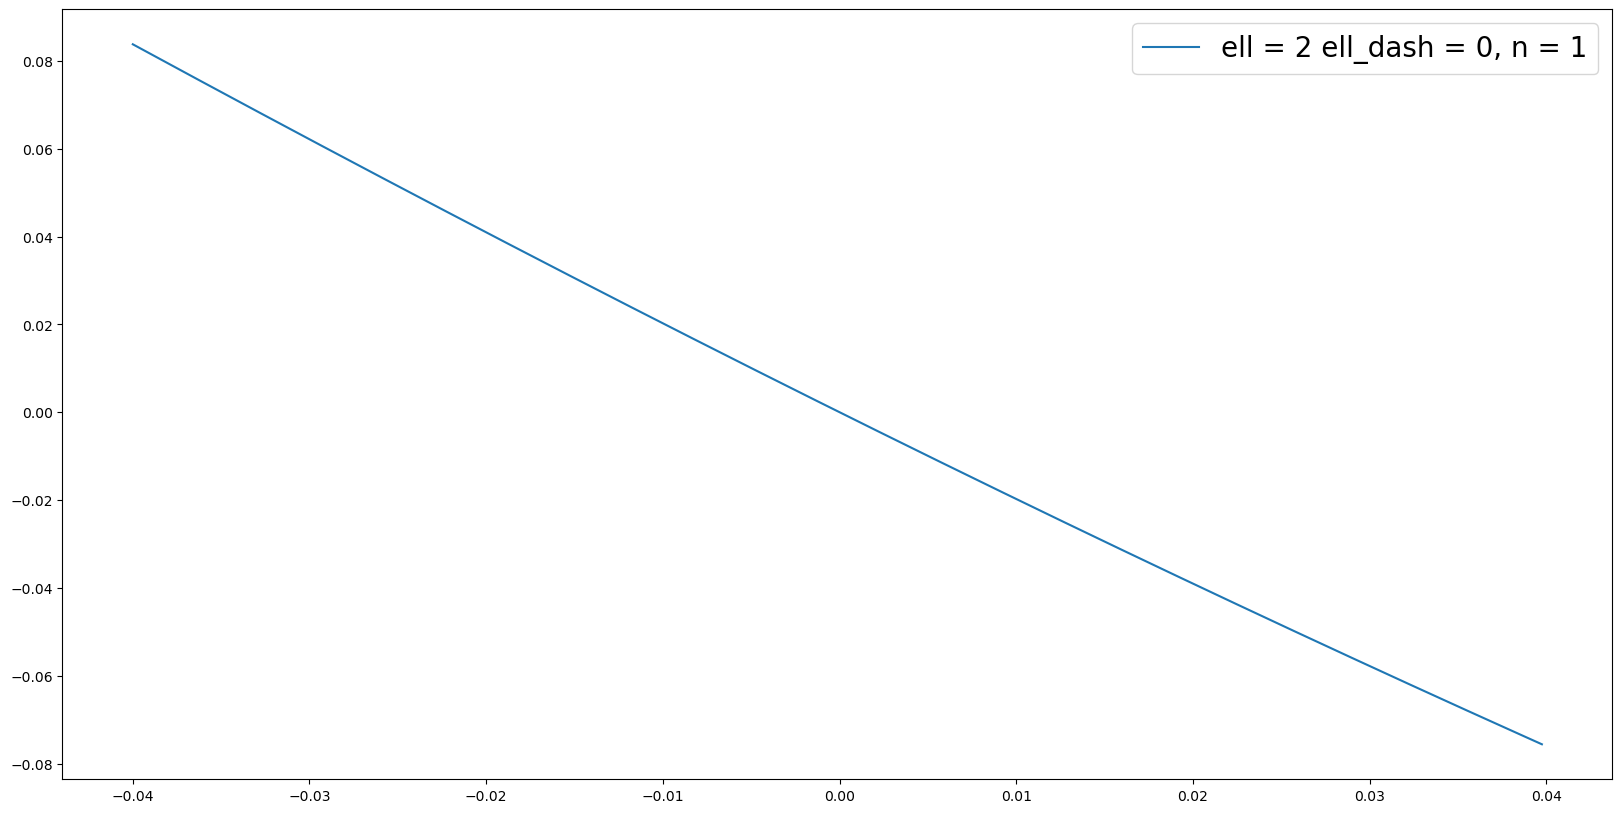

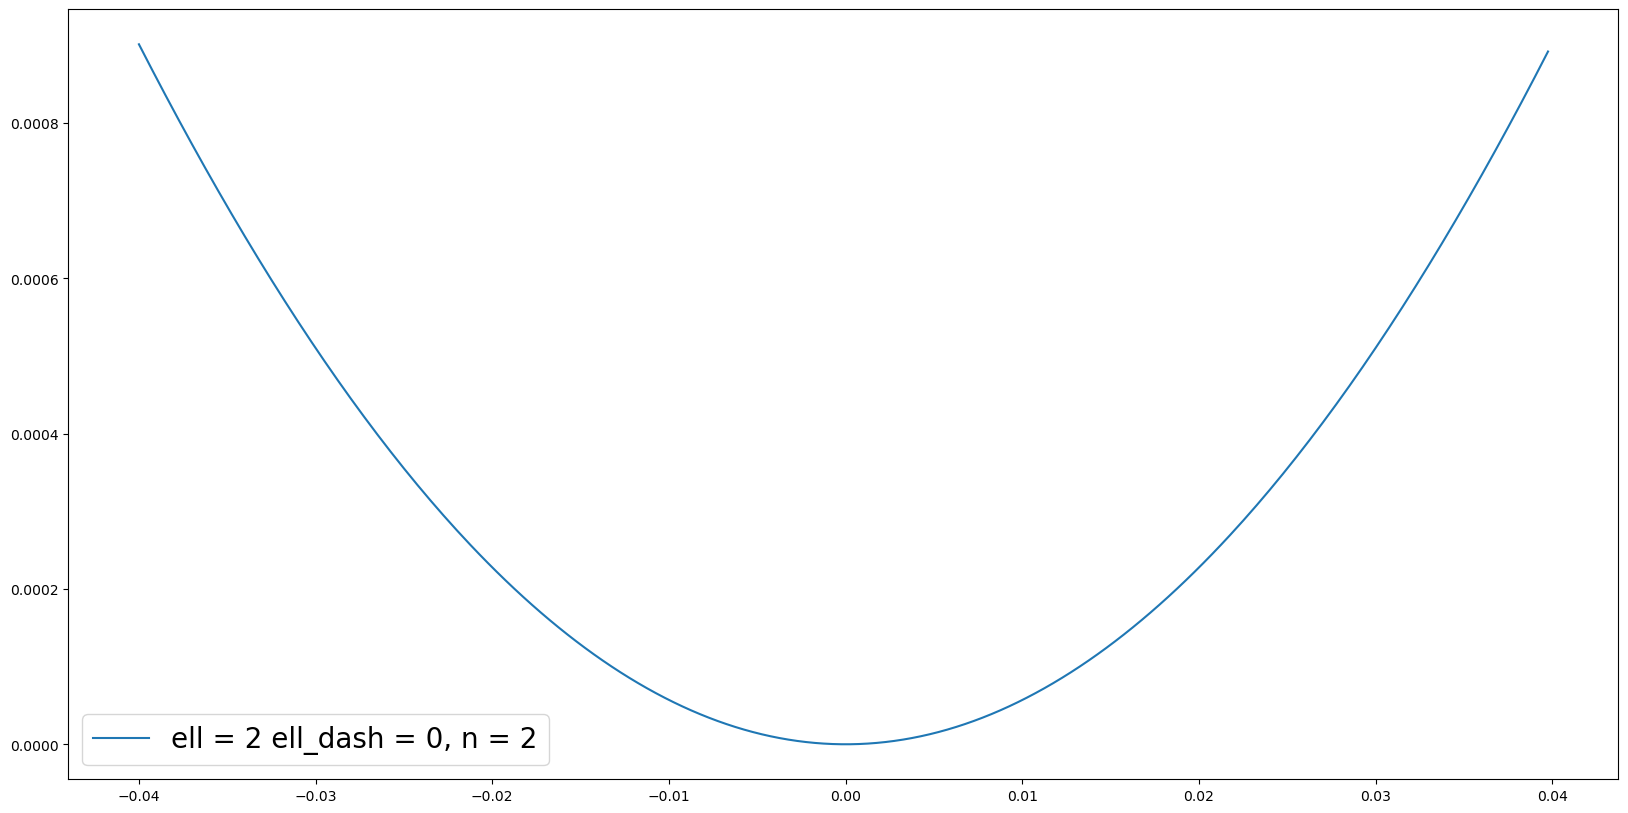

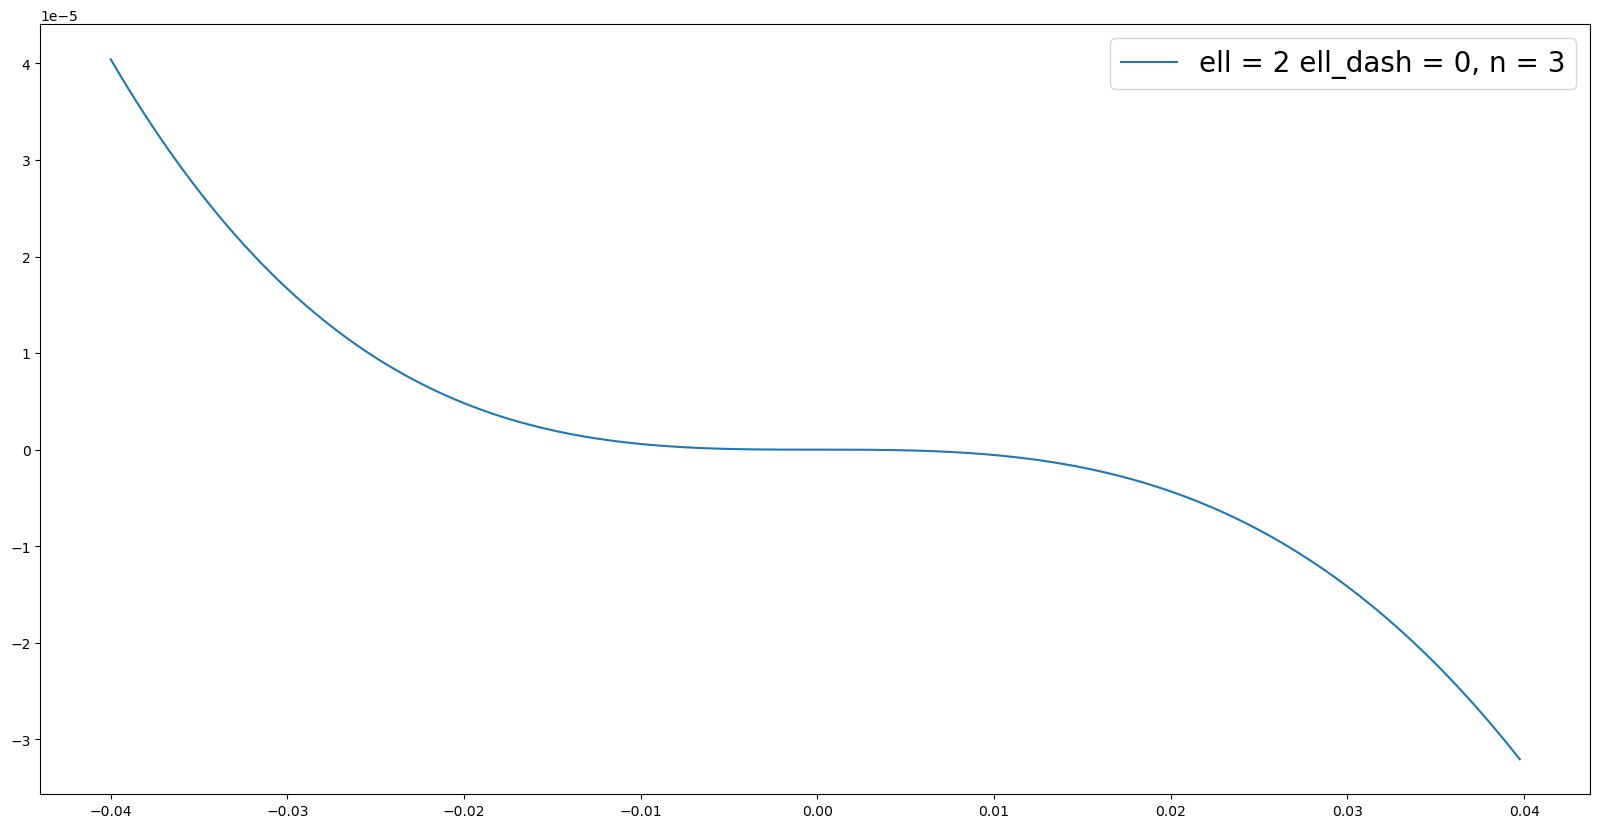

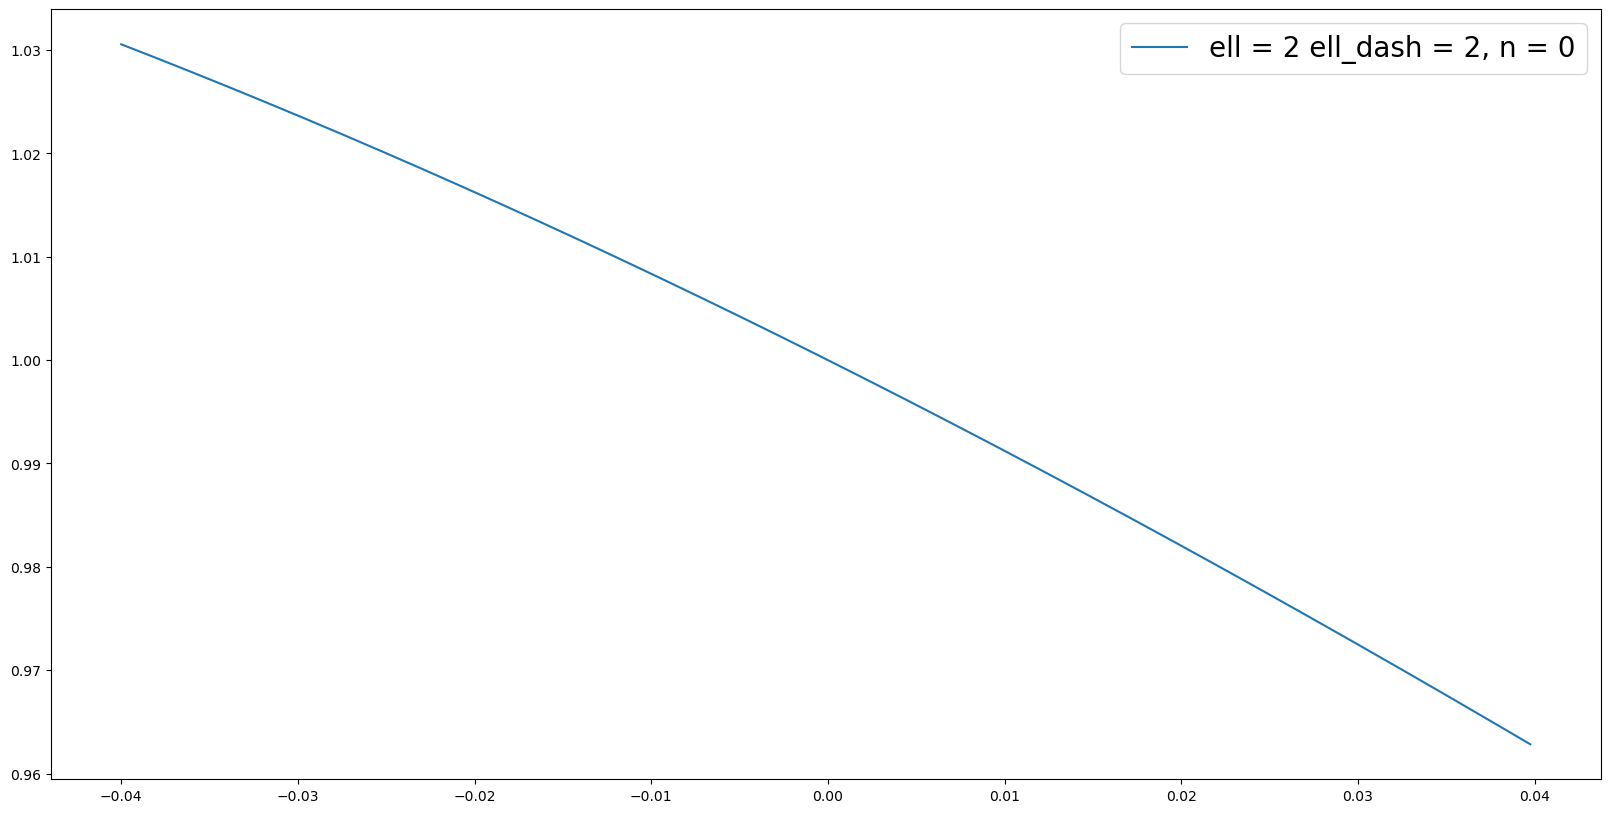

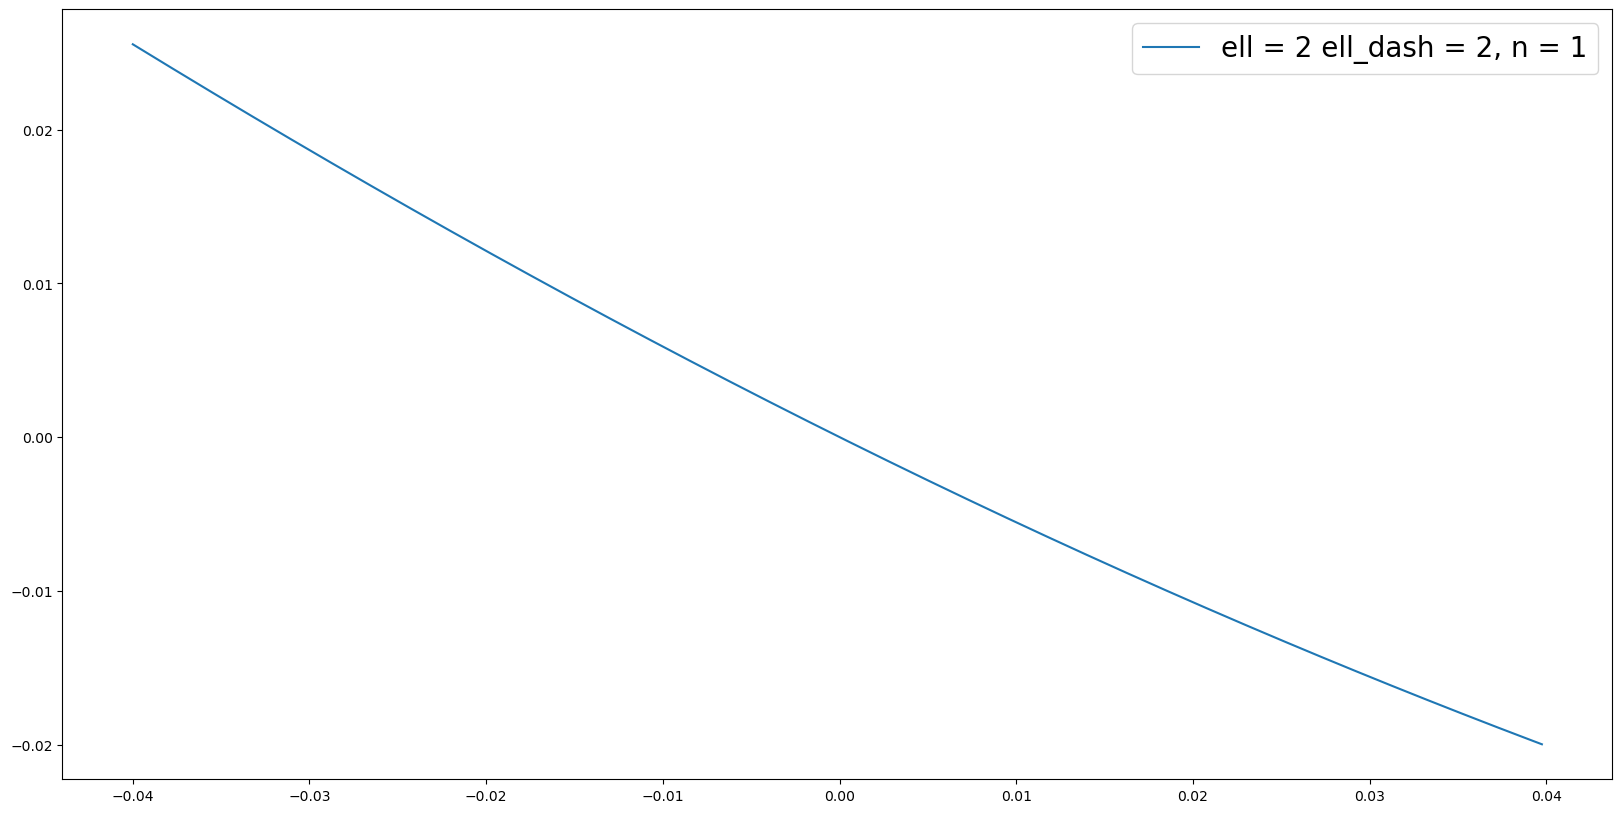

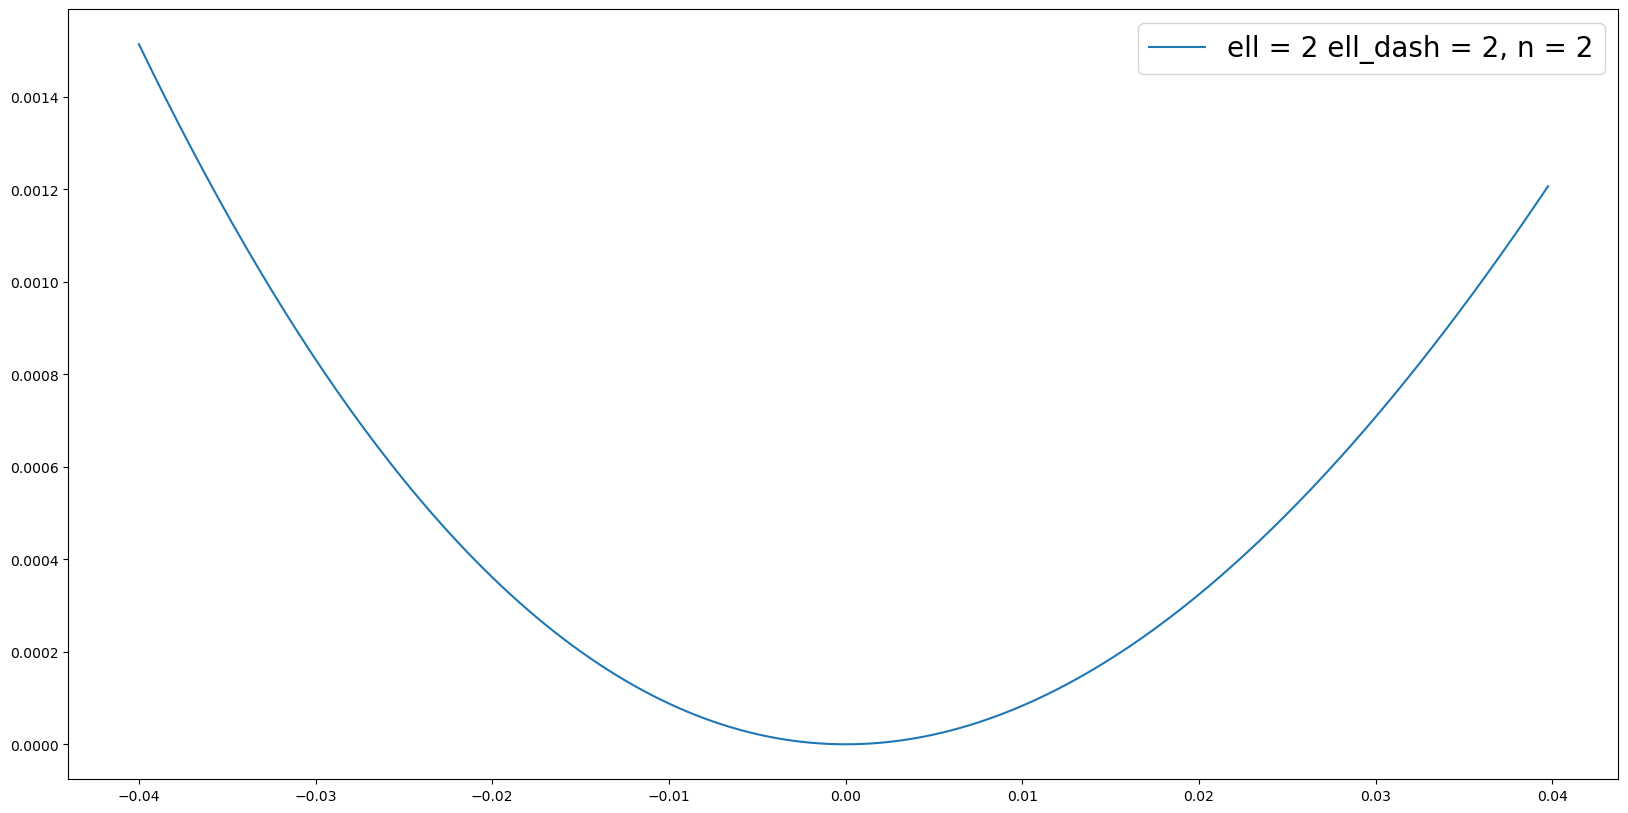

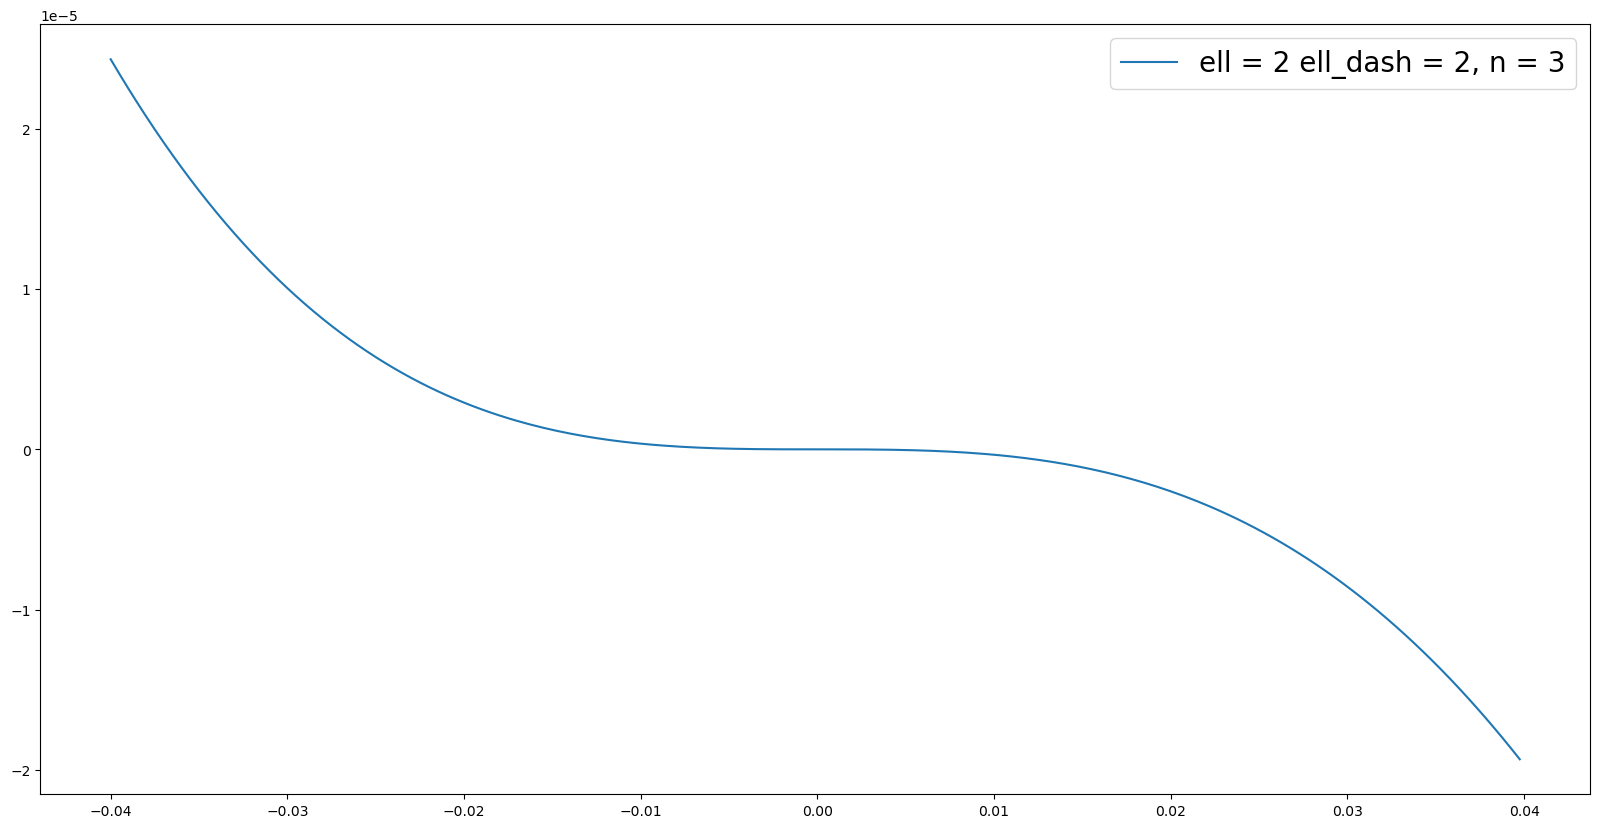

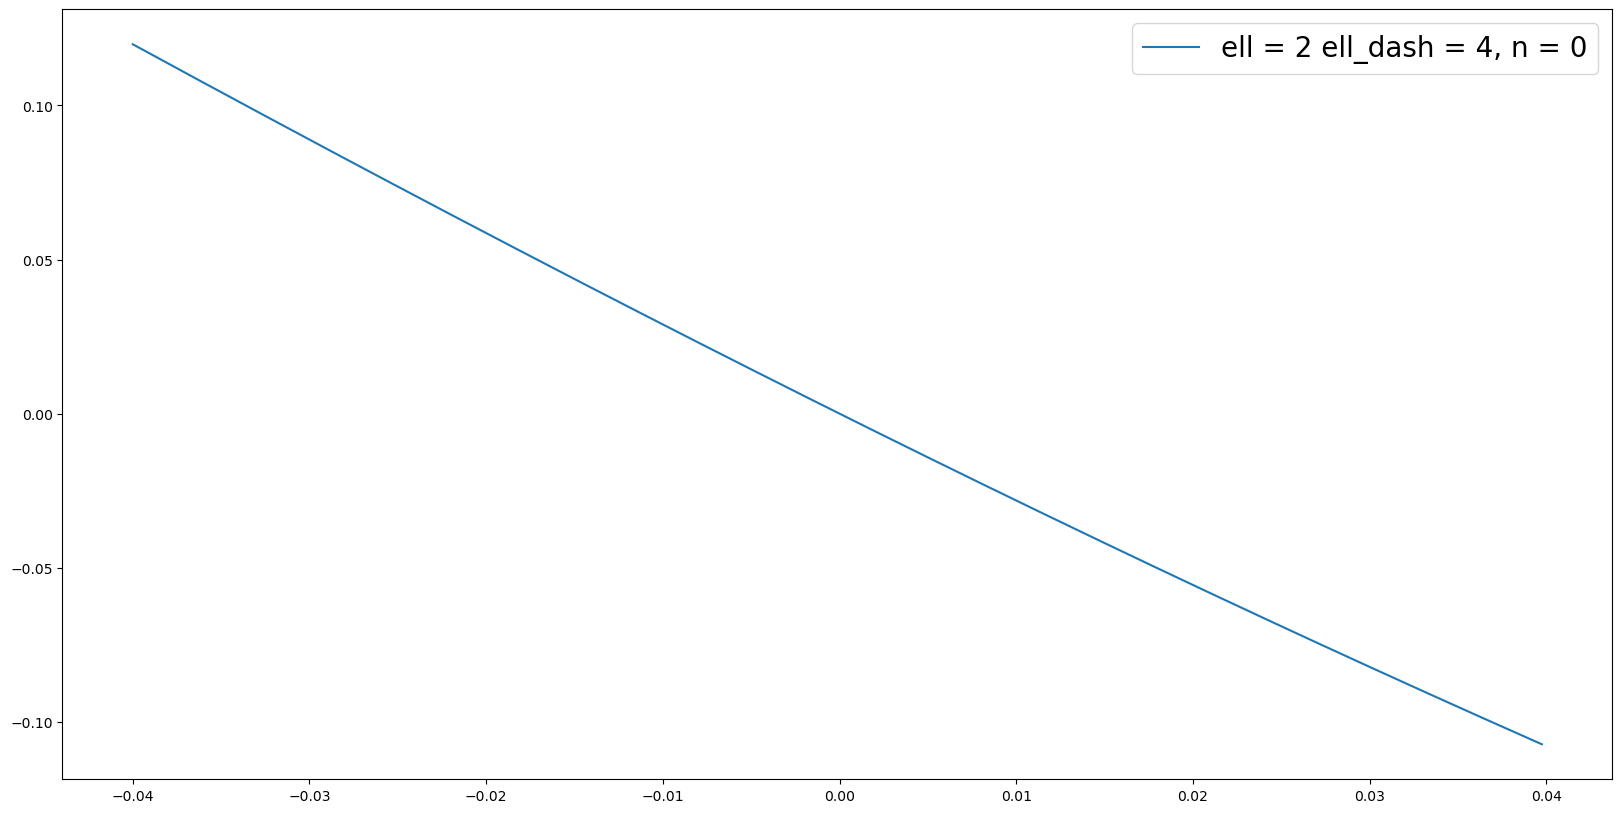

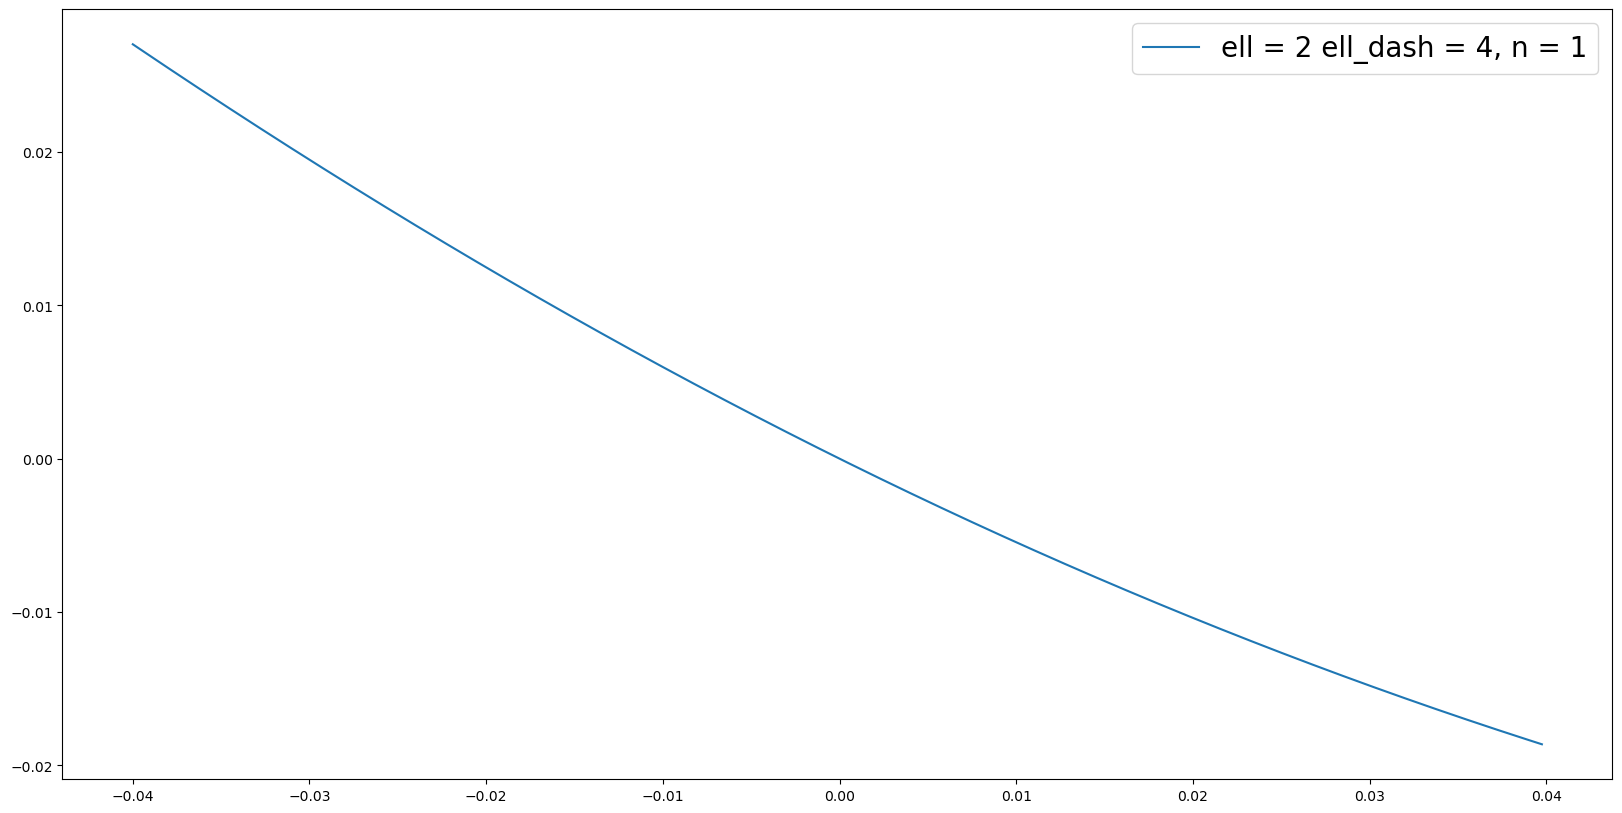

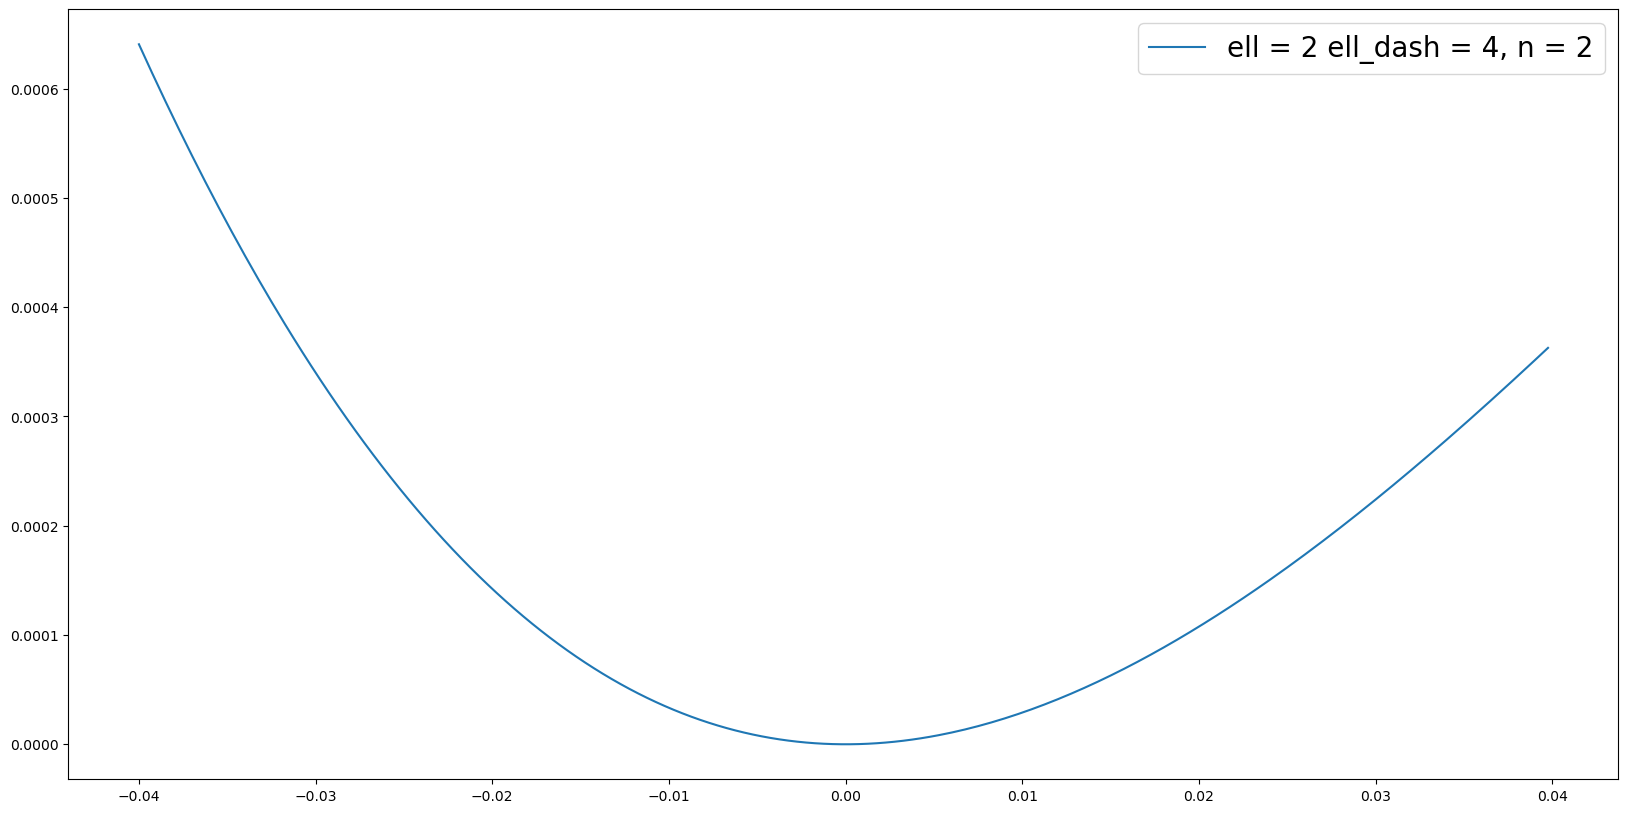

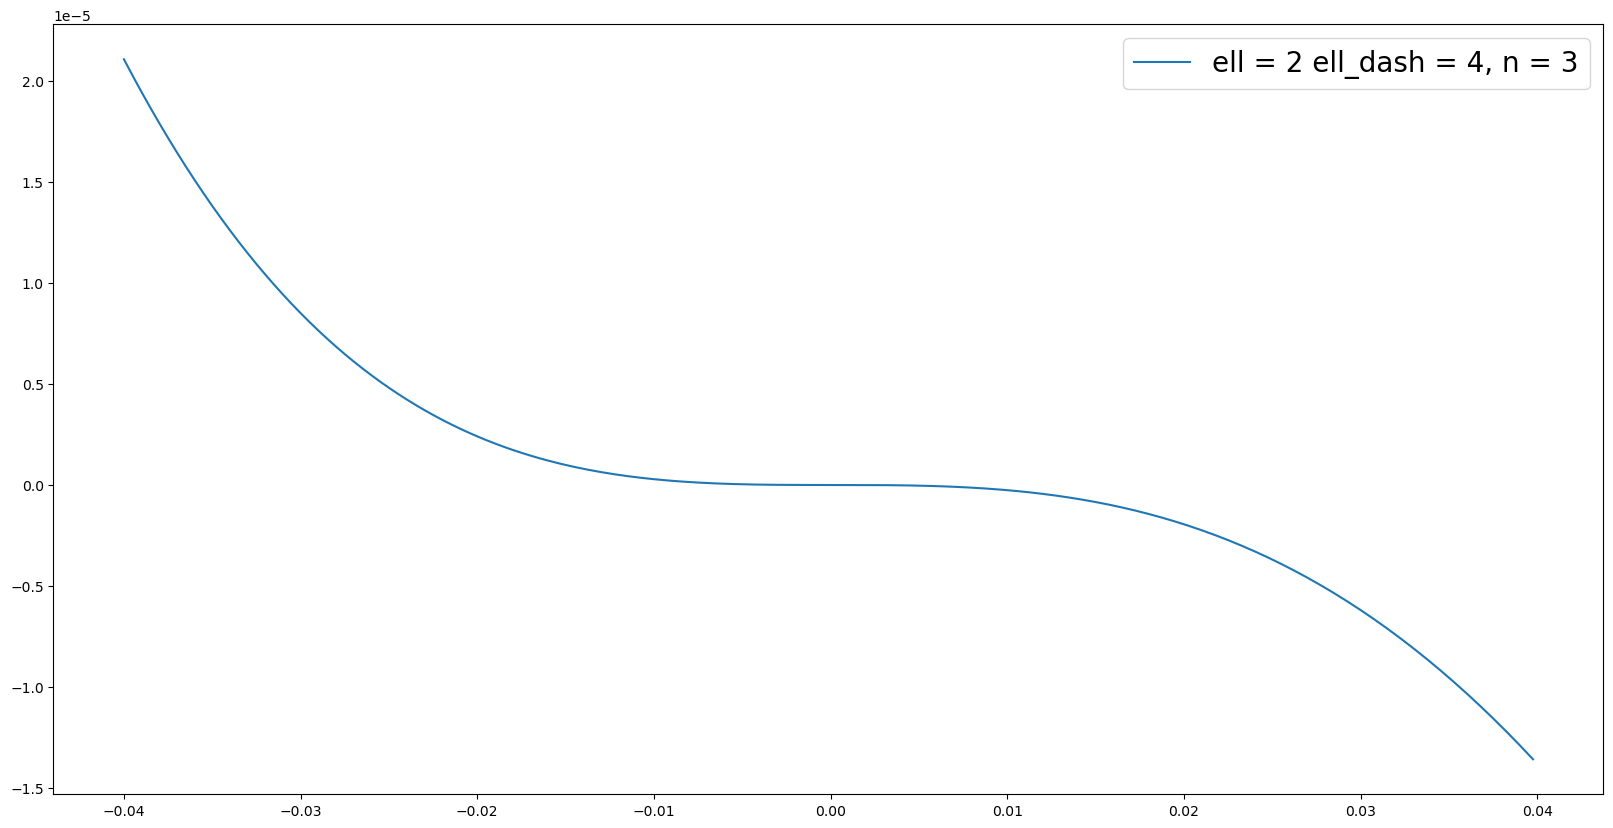

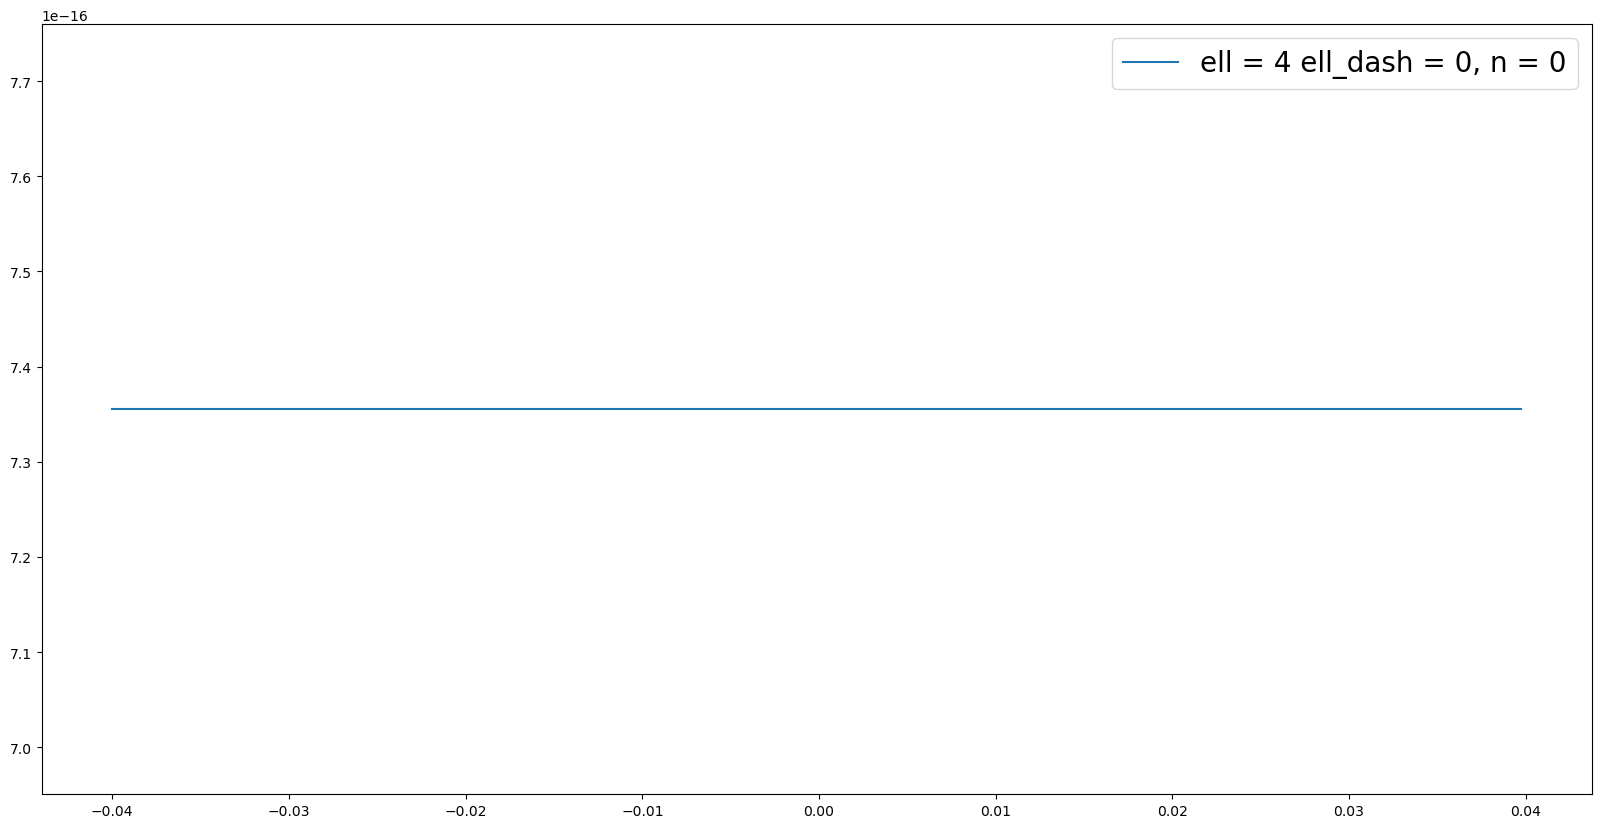

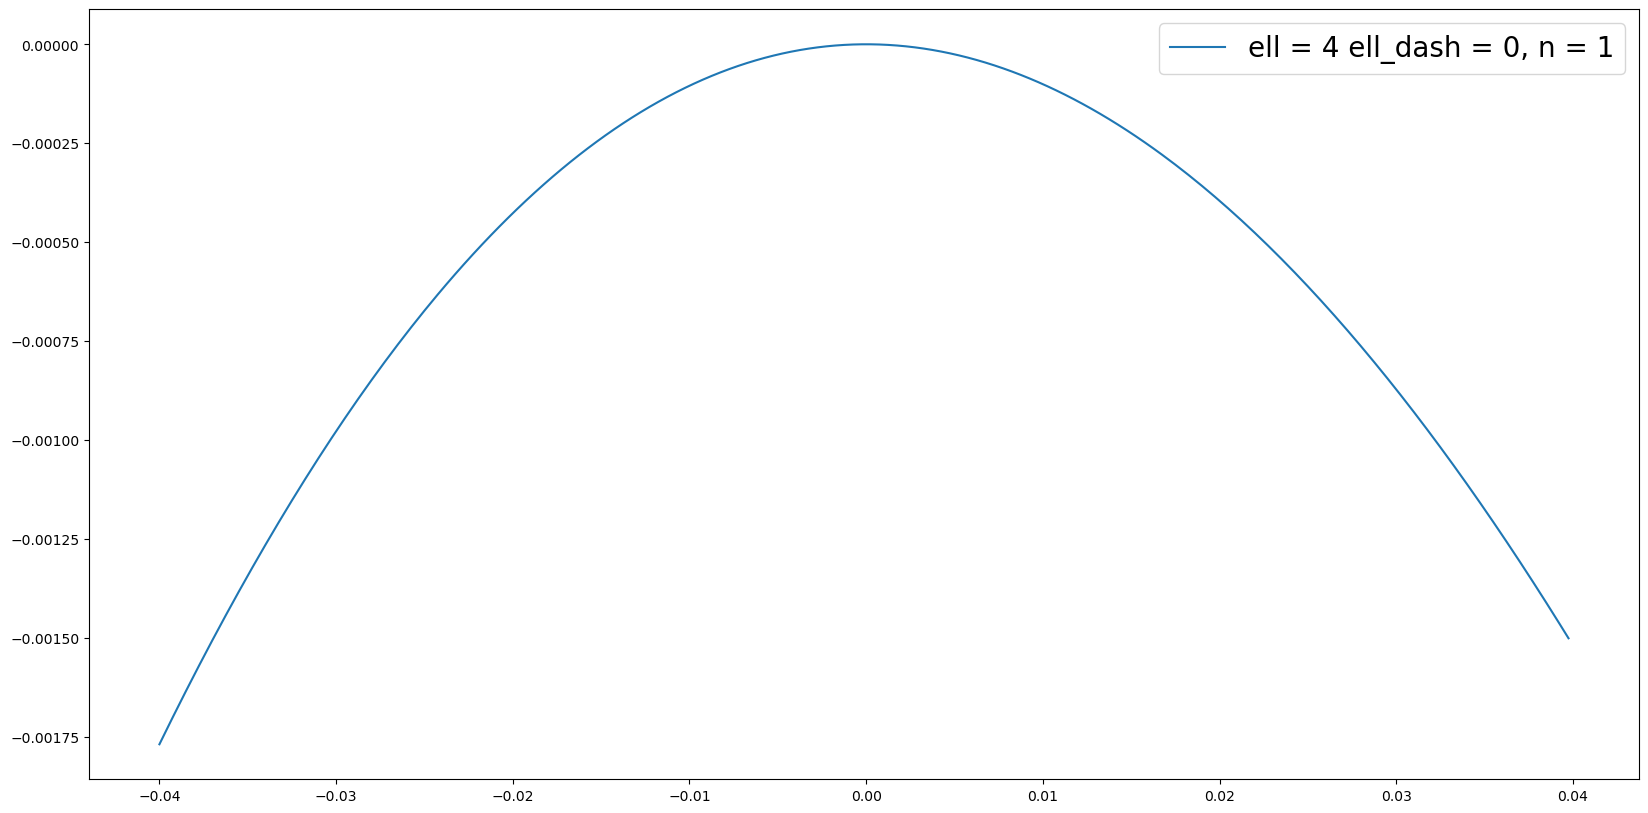

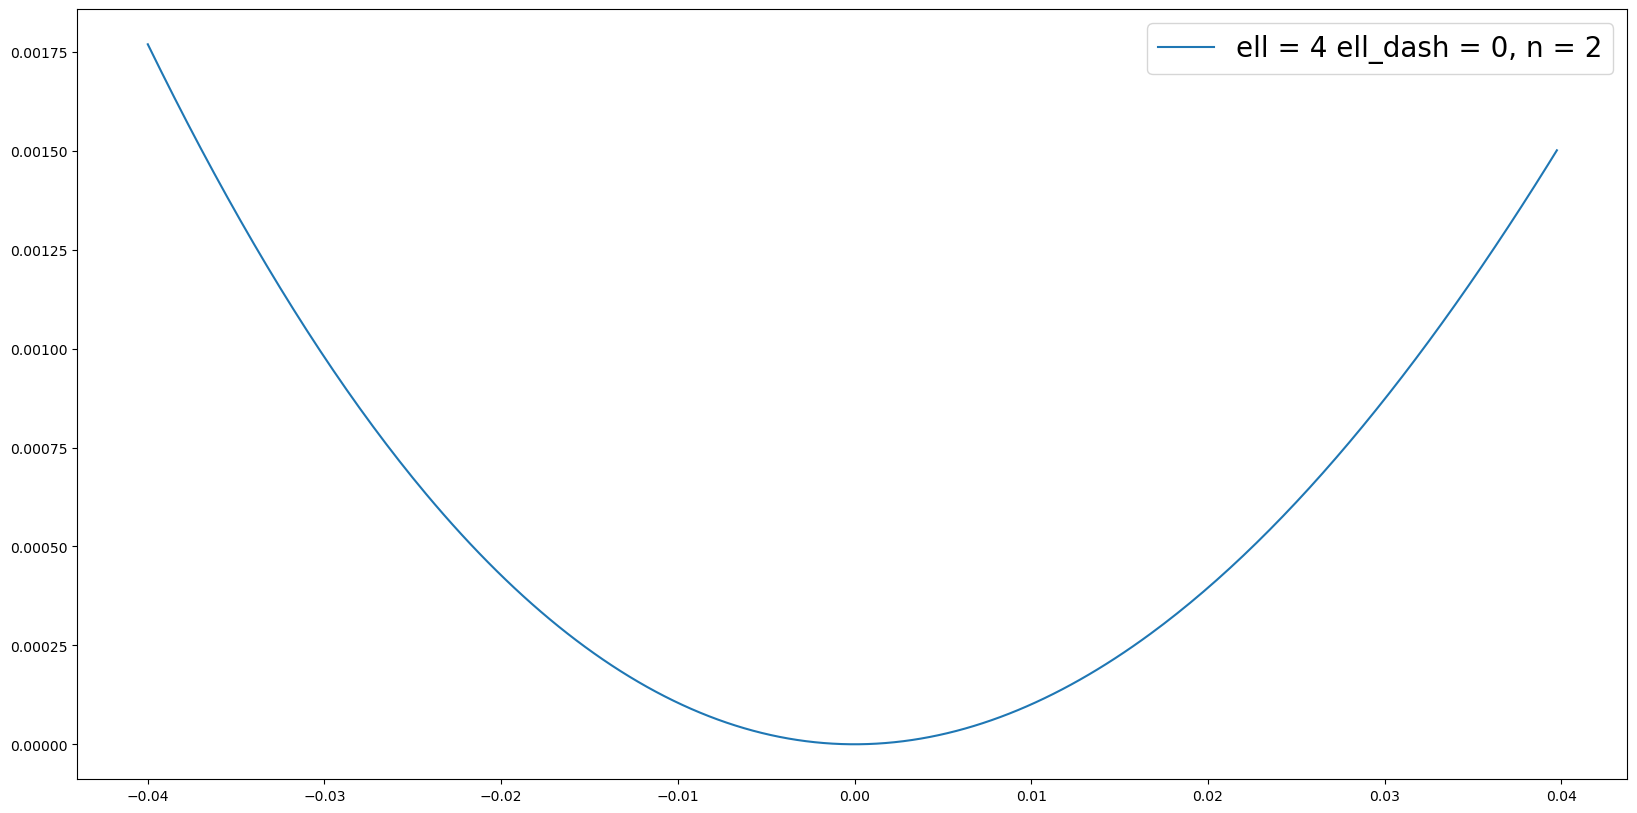

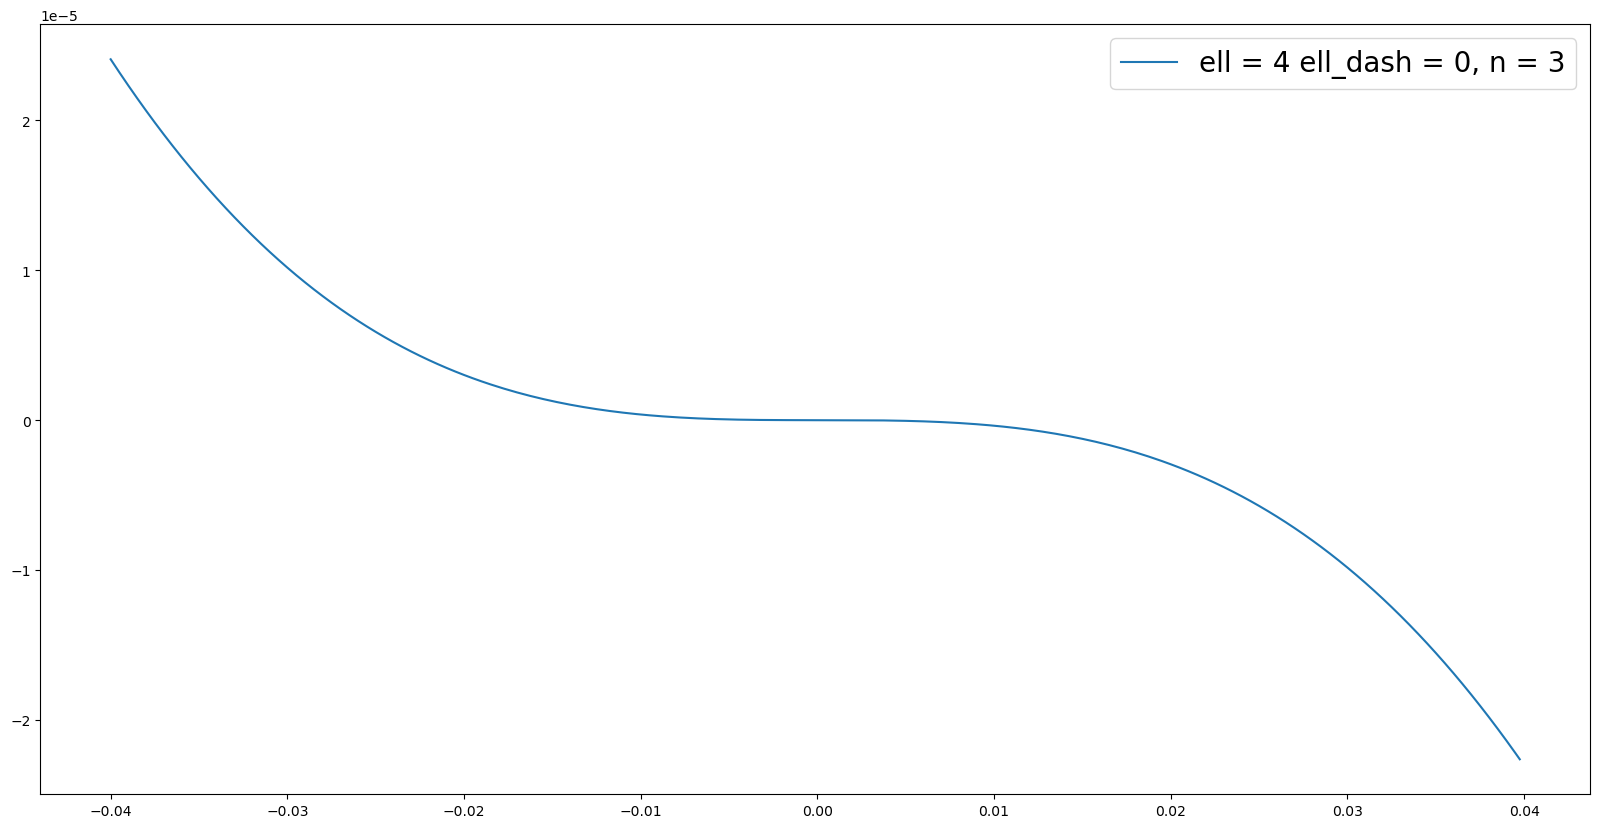

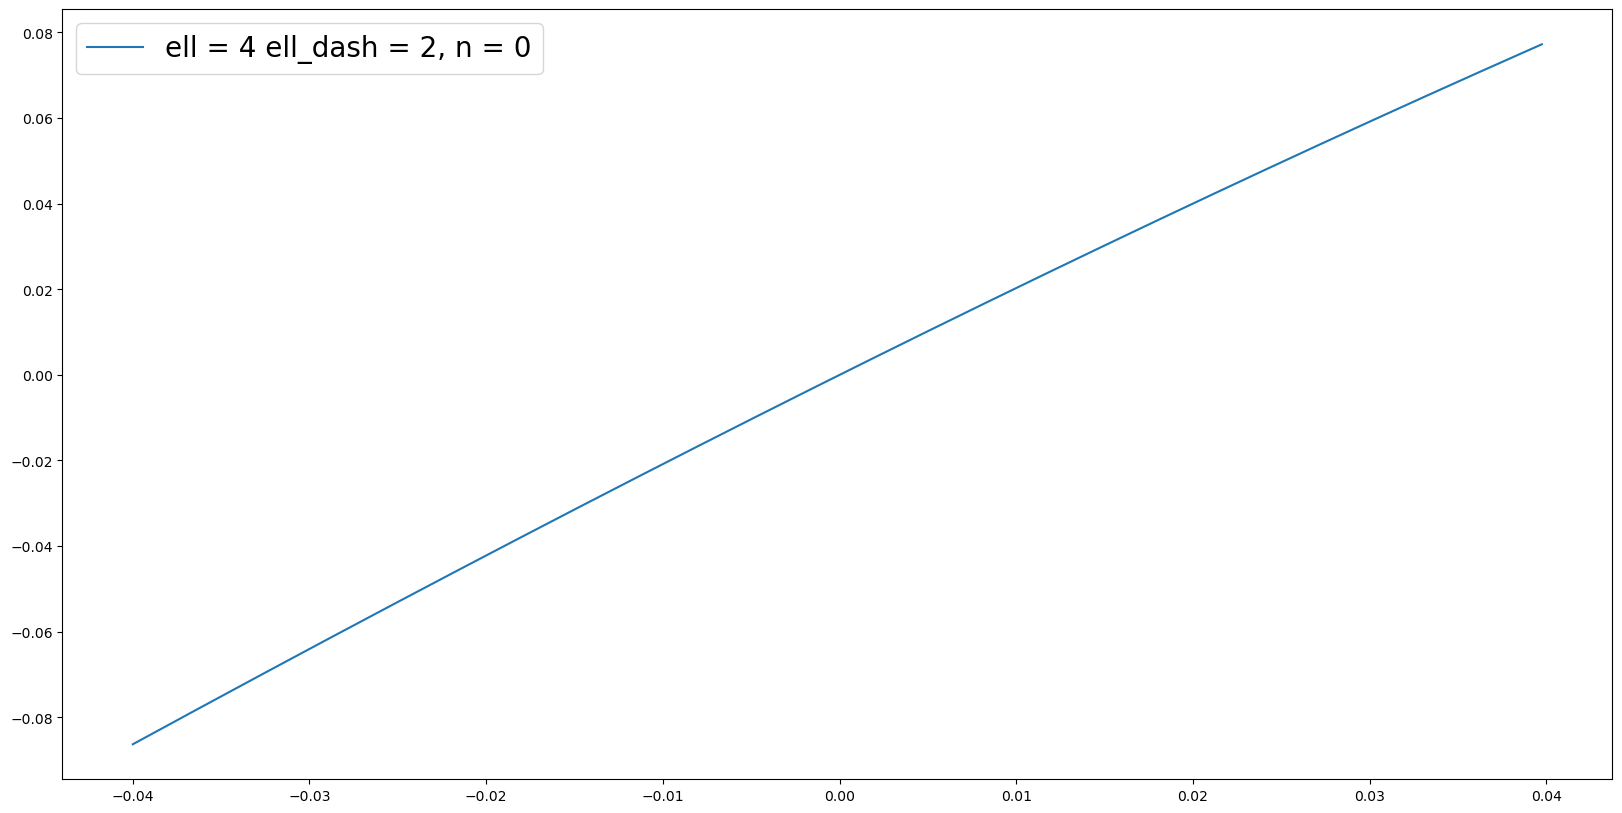

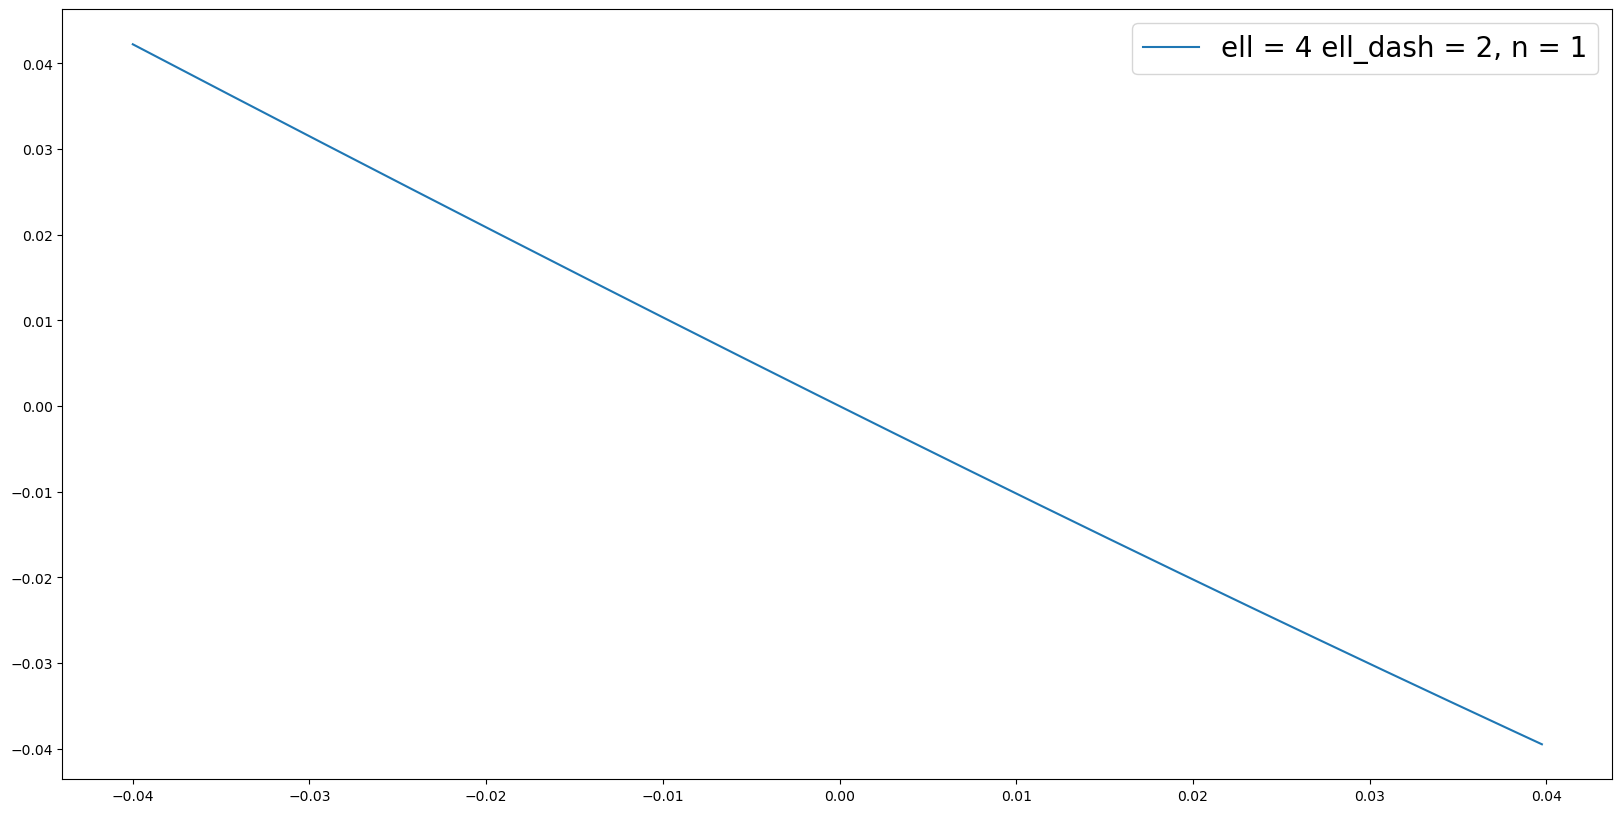

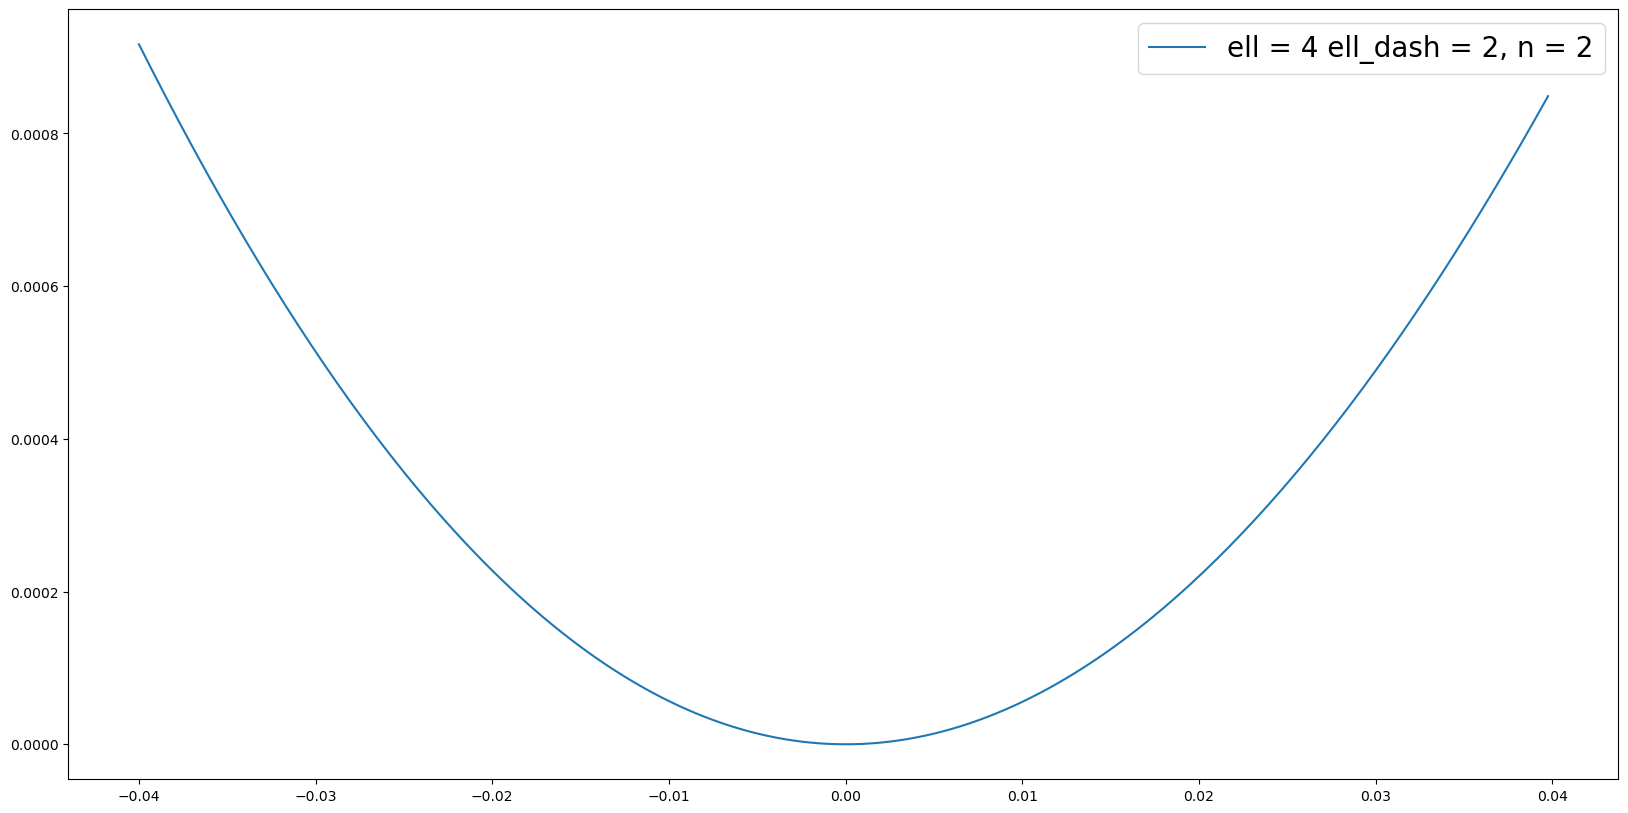

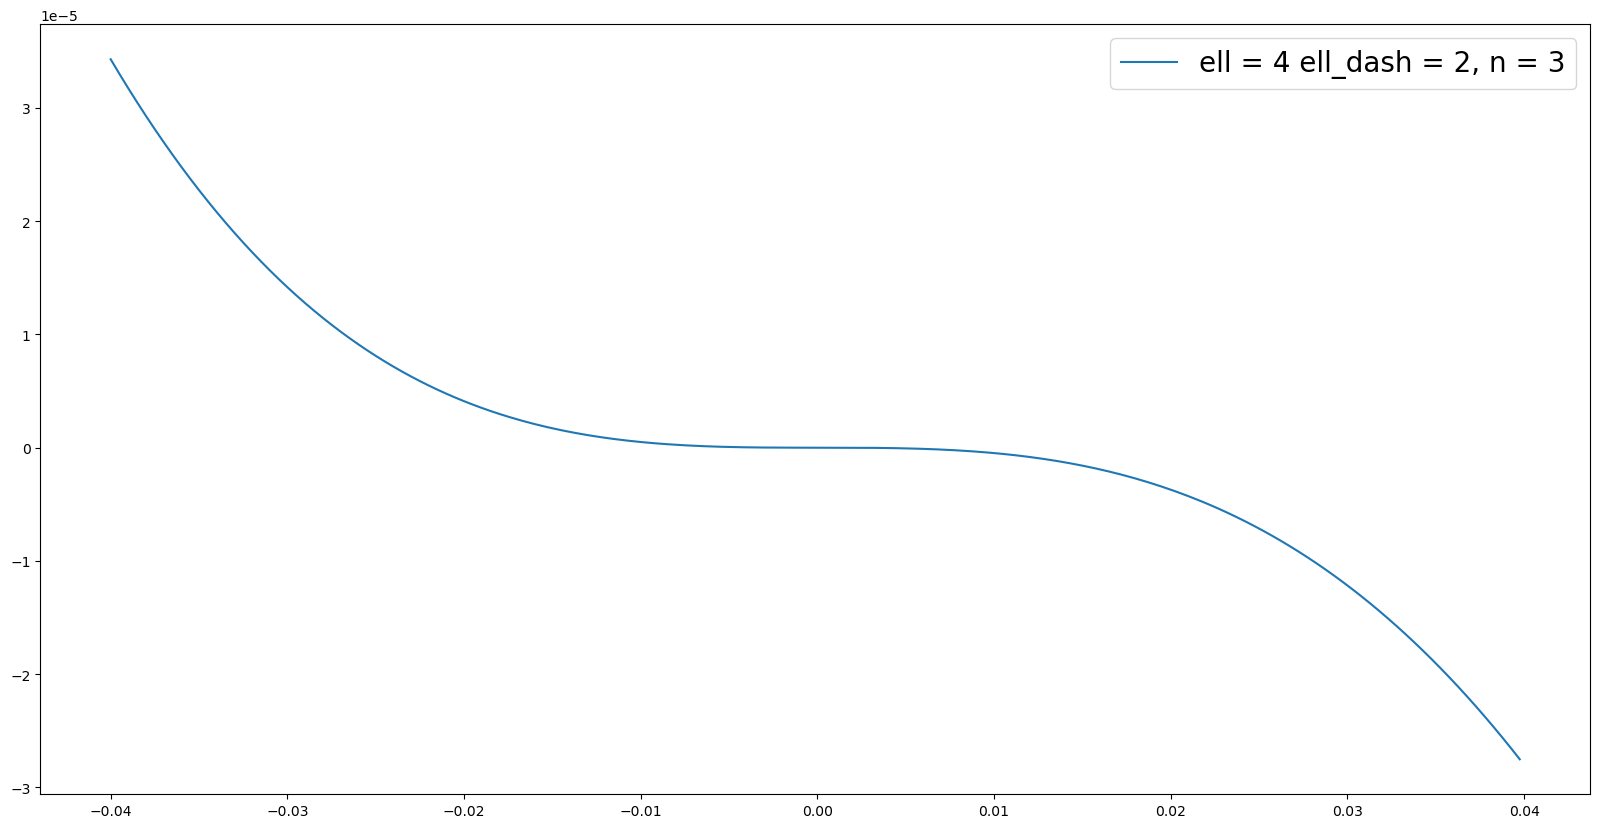

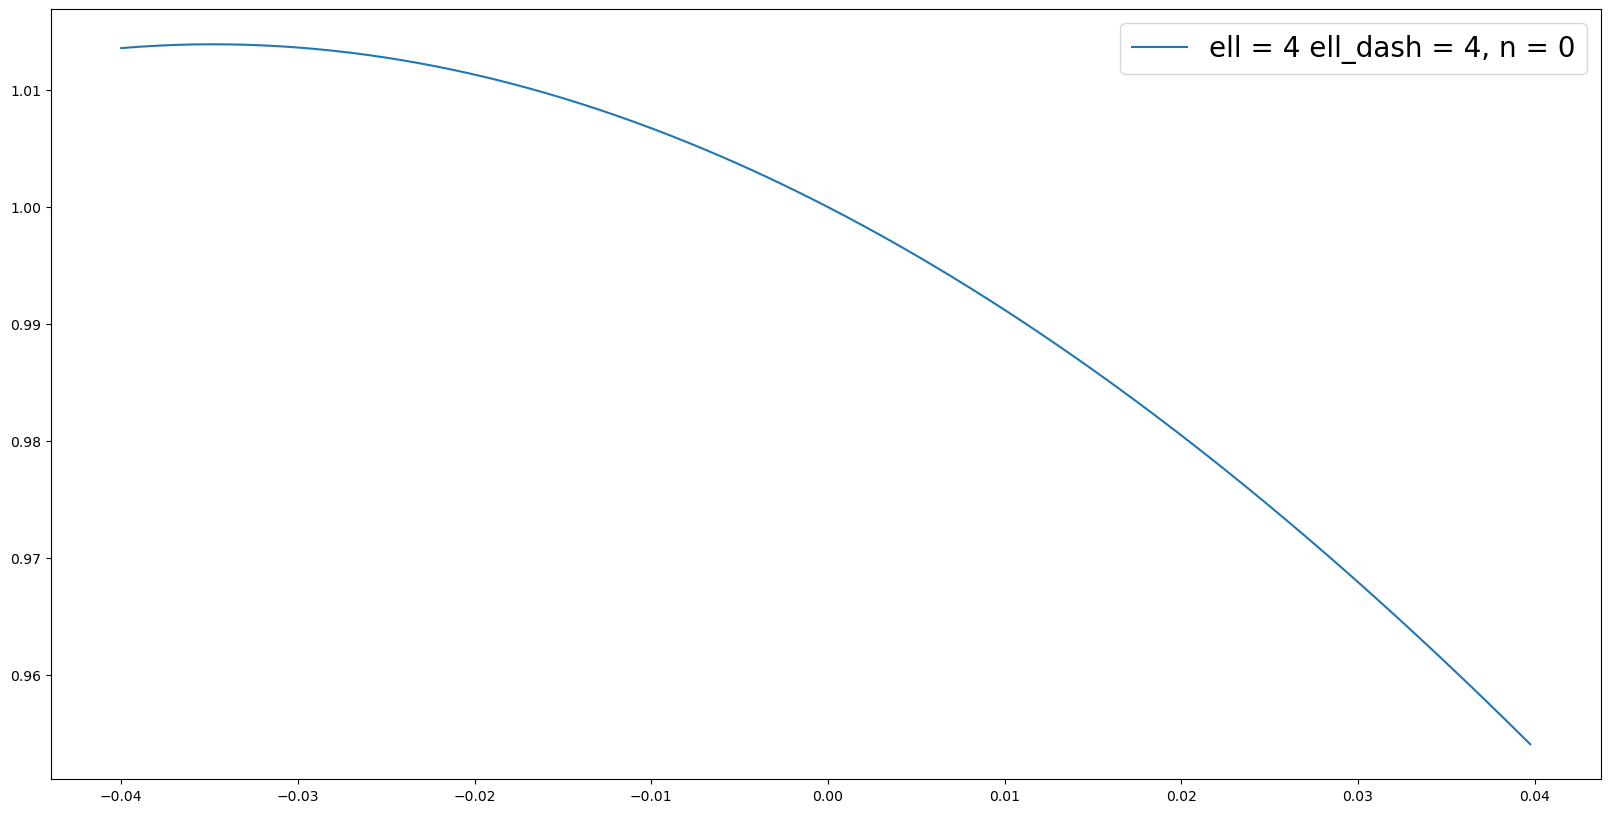

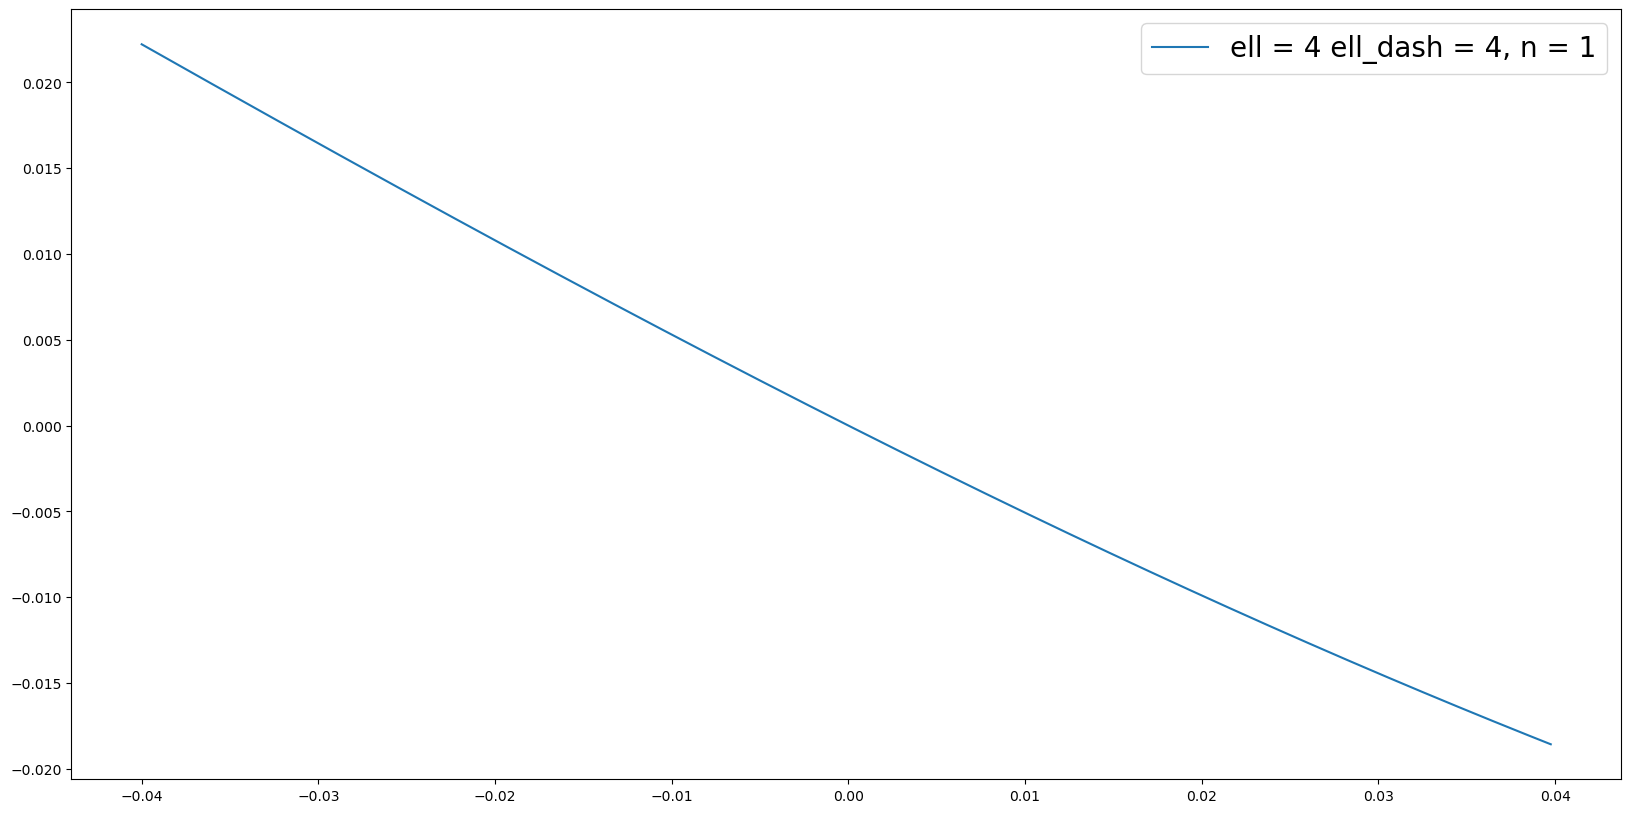

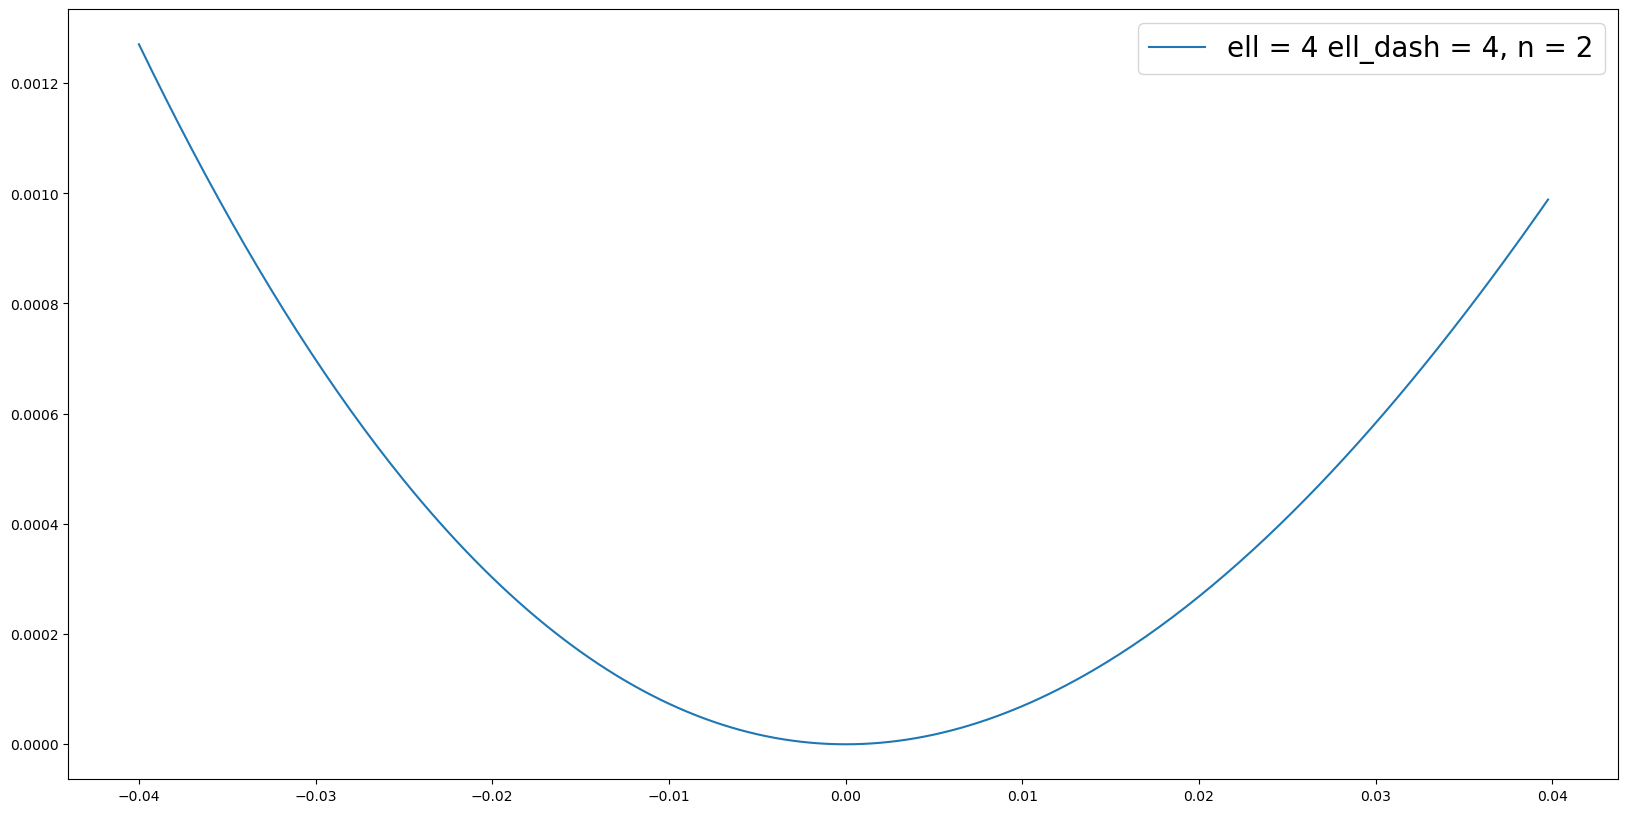

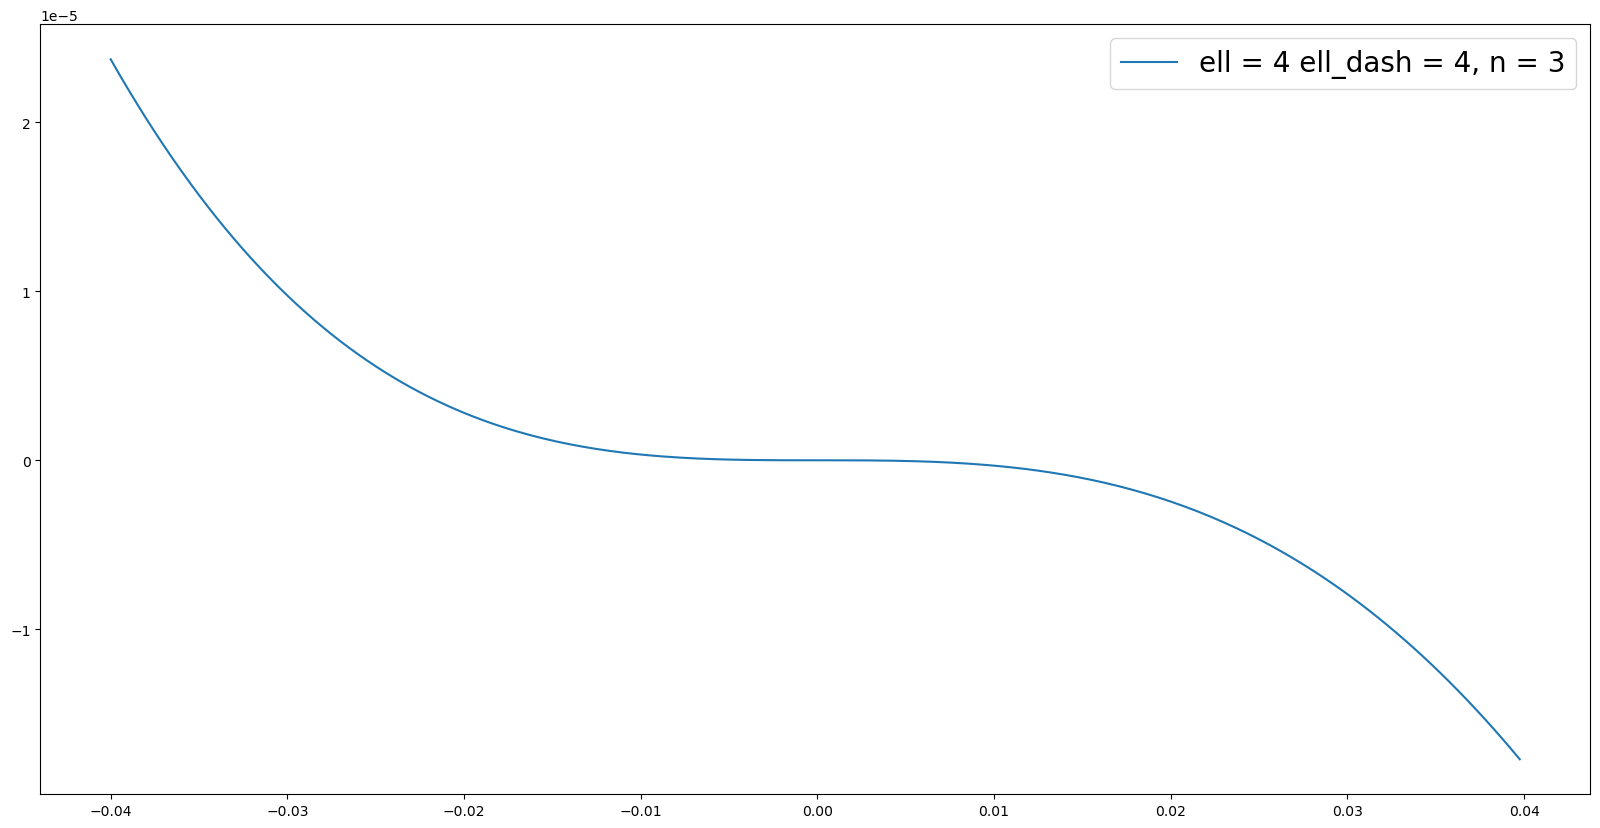

In [11]:
for ell in [0,2,4]:
    for ell_dash in [0,2,4]:
        for n in [0,1,2,3]:
            plt.plot(a[f'{ell}_{ell_dash}_{n}']['epsilon'],a[f'{ell}_{ell_dash}_{n}']['T'], label = f'ell = {ell} ell_dash = {ell_dash}, n = {n}')
            plt.legend(fontsize=20)
            plt.show()

In [17]:
%%time

h = .676
omega_cdm = .12
omega_b = .022
As = 2e-9
ns = .96

Omfid = (omega_cdm+omega_b)/h**2
print(Omfid)

z = .8

params_cosmo = {'k_output_values':2.0,'output': 'tCl mPk','z_max_pk': 3.,'P_k_max_h/Mpc': 50., 'z_pk':z,
            'omega_cdm':omega_cdm,'omega_b':omega_b,'h':h,
            'A_s': As,
            'n_s':ns}

cfid = Class()
cfid.set(params_cosmo)

cfid.set({'output':'mPk',
    'non linear':'PT',
    'IR resummation':'Yes',
    'Bias tracers':'Yes',
    'cb':'Yes',
    'RSD':'Yes',
    'AP':'No',
   })

cfid.compute()
Dfid = cfid.angular_distance(z)
Hfid = cfid.Hubble(z)

0.31073841952312586
CPU times: user 5.84 s, sys: 75.2 ms, total: 5.92 s
Wall time: 2.52 s


In [87]:
omega_cdm = (Omfid-10*.007)*h**2-.022
#omega_cdm = 0.22*h**2-.022

params_cosmo = {'k_output_values':2.0,'output': 'tCl mPk','z_max_pk': 3.,'P_k_max_h/Mpc': 50., 'z_pk':z,
            'omega_cdm':omega_cdm,'omega_b':omega_b,'h':h,
            'A_s': As,
            'n_s':ns}

c = Class()
c.set(params_cosmo)

c.set({'output':'mPk',
    'non linear':'PT',
    'IR resummation':'Yes',
    'Bias tracers':'Yes',
    'cb':'Yes',
    'RSD':'Yes',
    'AP':'No',
   })

c.compute()
D = c.angular_distance(z)
H = c.Hubble(z)

In [88]:
aperp = D/Dfid
apar = Hfid/H
eps = (apar/aperp)**(1/3)-1

a_lado = (aperp**2*apar)**(1/3)
e_lado = (aperp*apar)**(2/3)

In [89]:
print(a_lado)
print(e_lado)

1.0500012607630473
1.075724945919432


In [90]:
print(aperp)
print(apar)
print(eps)

1.037570466980326
1.0753114204749827
0.011980674256177437


In [91]:
cclass = Class()
cclass.set(params_cosmo)

cclass.set({'output':'mPk',
    'non linear':'PT',
    'IR resummation':'Yes',
    'Bias tracers':'Yes',
    'cb':'Yes',
    'RSD':'Yes',
    'AP':'Yes',
    'Omfid':Omfid,
   })

cclass.compute()

In [92]:
k = np.arange(.005,.3025,0.0025)
output_parameters = (k, z, 119)

b1 = 2
b2 = -1
bG2 = .1
bGamma3 = -.1
b4 = 100
c0 = 5
Pshot = 0

# Initialize outputs
c.initialize_output(*output_parameters)
cclass.initialize_output(*output_parameters)

# Calculate pkfid and pkclass
pknoap = {}
pkclass = {}
for ell in [0, 2, 4]:
    if ell == 0:
        pknoap[ell] = c.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
        pkclass[ell] = cclass.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
    elif ell == 2:
        pknoap[ell] = c.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
        pkclass[ell] = cclass.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
    elif ell == 4:
        pknoap[ell] = c.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)
        pkclass[ell] = cclass.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)

In [93]:
k = np.arange(.005,.3025,0.0025)
output_parameters = (k, z, 119)

b1 = 2
b2 = 0
bG2 = 0
bGamma3 = 0
b4 = 0
c0 = 0
Pshot = 0

# Initialize outputs
c.initialize_output(*output_parameters)
cclass.initialize_output(*output_parameters)

# Calculate pkfid and pkclass
pknoap_lin = {}
pkclass_lin = {}
for ell in [0, 2, 4]:
    if ell == 0:
        pknoap_lin[ell] = c.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
        pkclass_lin[ell] = cclass.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
    elif ell == 2:
        pknoap_lin[ell] = c.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
        pkclass_lin[ell] = cclass.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
    elif ell == 4:
        pknoap_lin[ell] = c.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)
        pkclass_lin[ell] = cclass.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)

In [94]:
mult = c.get_pk_mult(k, z, len(k))
multclass = cclass.get_pk_mult(k, z, len(k))

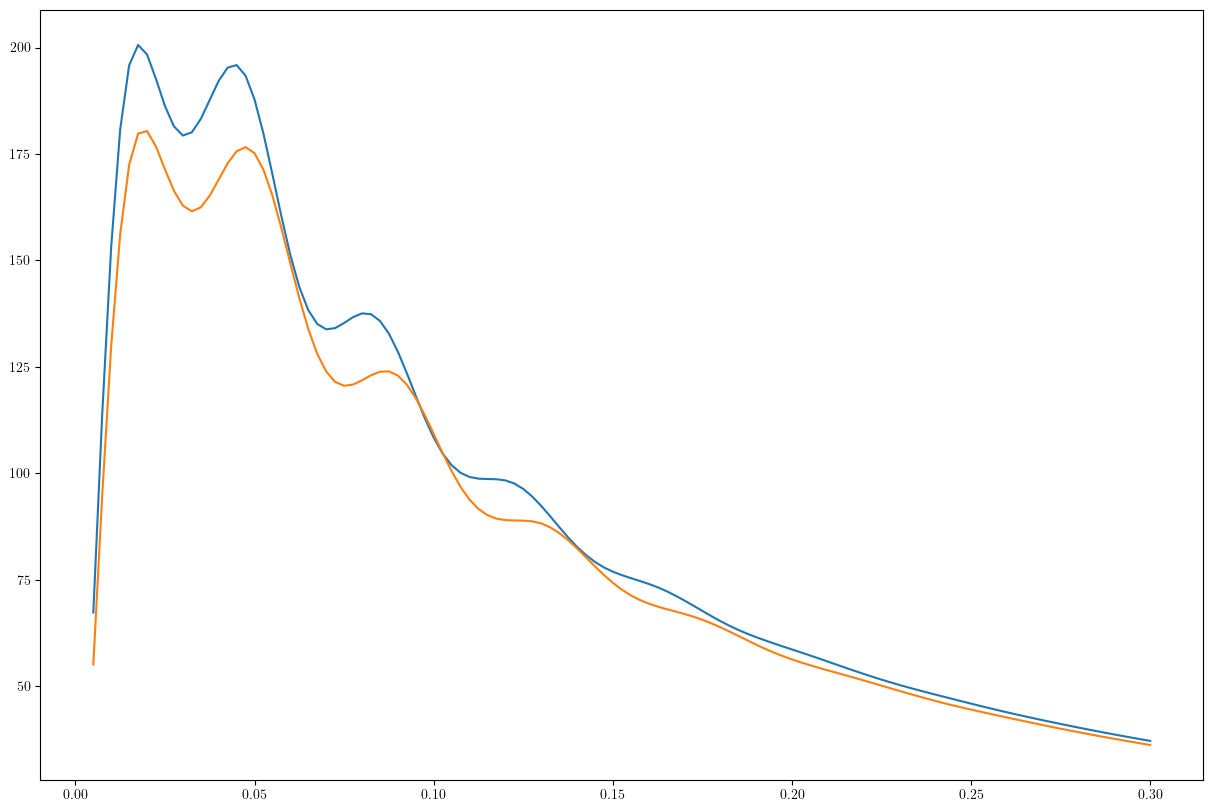

In [95]:
plt.plot(k,k*mult[18])
plt.plot(k,k*multclass[18])

In [96]:
def k_prime(k, alpha_parallel=1, alpha_perp=1, epsilon=0, alpha=1):
    """
    Isotropic rescaling of the wavenumber.
    Uses either alpha_parallel, alpha_perp or epsilon, alpha.

    Parameters:
    k (np.array): Wavenumber in the fiducial cosmology.
    alpha_parallel (float): AP scaling parallel to the line-of-sight. Default is 1.
    alpha_perp (float): AP scaling perpendicular to the line-of-sight. Default is 1.
    epsilon (float): AP distortion. Default is 0.
    alpha (float): Isotropic AP scaling. Default is 1.

    Returns:
    np.array: Rescaled wavenumber.
    """

    if epsilon == 0:
        epsilon, alpha = epsilon_alpha(alpha_parallel, alpha_perp)

    kp = k * (1 + epsilon) / alpha * (1 + 1 / 3 * ((1 + epsilon) ** (-6) - 1)) ** (1 / 2)

    return kp

def epsilon_alpha(alpha_parallel, alpha_perp):
    """
    Change of the basis for the Alcock-Paczynski effect.
    Converts from alpha_parallel, alpha_perp to epsilon, alpha.

    Parameters:
    alpha_parallel (float): AP scaling parallel to the line-of-sight.
    alpha_perp (float): AP scaling perpendicular to the line-of-sight.

    Returns:
    tuple: Tuple containing epsilon (AP distortion) and alpha (isotropic AP scaling).
    """

    epsilon = (alpha_parallel / alpha_perp) ** (1 / 3) - 1
    alpha = (alpha_perp ** 2 * alpha_parallel) ** (1 / 3)

    return epsilon, alpha

In [97]:
def calculate_pd(n, pktmp, kp):
    """Calculates the derivative based on the order 'n'"""
    pd = pktmp
    for _ in range(n):
        pd = np.gradient(pd, kp)
    return pd

def calculate_pk(ell1, ell2, n, a, eps, pd, kp):
    
    fun = interpolate.interp1d(
        a[f'{ell1}_{ell2}_{n}']['epsilon'], 
        a[f'{ell1}_{ell2}_{n}']['T'], 
        fill_value="extrapolate", 
        kind="cubic"
    )
    result = fun(eps)*pd*kp**n
    return result

pkap = {}
pkindiv = {}
kp = k_prime(k, apar, aperp)

for ell in [0, 2, 4]:
    pkap[ell] = {m: np.zeros((len(kp))) for m in [0, 1, 2, 3]}
    pkindiv[ell] = {}
    
    for ell_dash in [0, 2, 4]:
        pkindiv[ell][ell_dash] = {m: np.zeros((len(kp))) for m in [0, 1, 2, 3]}
        f_pk = interpolate.interp1d(k, pknoap[ell_dash], fill_value="extrapolate", kind="cubic")
        
        for n in [0, 1, 2, 3]:
            pktmp = f_pk(kp)
            pd = calculate_pd(n, pktmp, kp)
            pkindiv[ell][ell_dash][n] = calculate_pk(ell, ell_dash, n, a, eps, pd, kp)
            
            for m in [0, 1, 2, 3]:
                if n <= m:
                    pkap[ell][m] += calculate_pk(ell, ell_dash, n, a, eps, pd, kp)

for ell in [0, 2, 4]:
    for n in [0, 1, 2, 3]:
        pkap[ell][n] /= (aperp**2*apar)
        for ell_dash in [0, 2, 4]:
            pkindiv[ell][ell_dash][n] /= (aperp**2*apar)

In [98]:
pkap_lin = {}

for ell in [0, 2, 4]:
    pkap_lin[ell] = {m: np.zeros((len(kp))) for m in [0, 1, 2, 3]}
    
    for ell_dash in [0, 2, 4]:
        f_pk = interpolate.interp1d(k, pknoap_lin[ell_dash], fill_value="extrapolate", kind="cubic")
        
        for n in [0, 1, 2, 3]:
            pktmp = f_pk(kp)
            pd = calculate_pd(n, pktmp, kp)
            
            for m in [0, 1, 2, 3]:
                if n <= m:
                    pkap_lin[ell][m] += calculate_pk(ell, ell_dash, n, a, eps, pd, kp)

for ell in [0, 2, 4]:
    for n in [0, 1, 2, 3]:
        pkap_lin[ell][n] /= (aperp**2*apar)

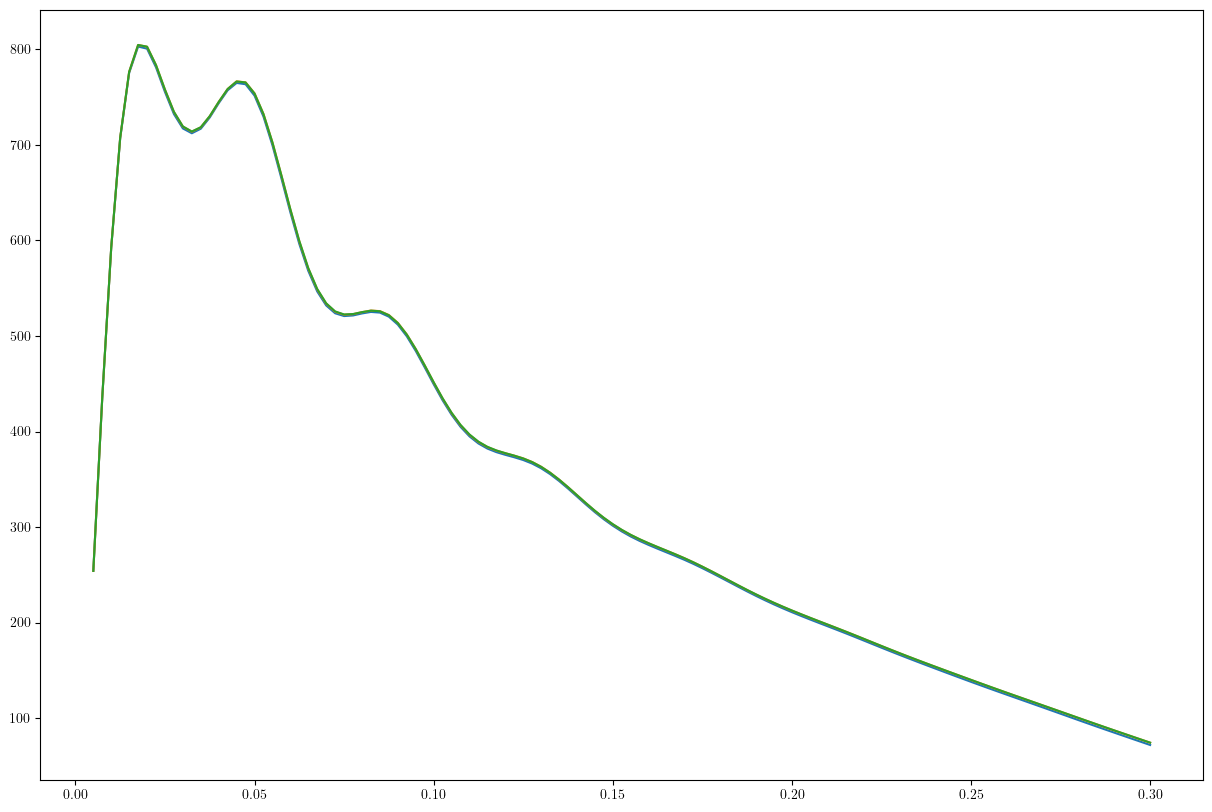

In [99]:
plt.plot(k,k*pkap[0][0])
plt.plot(k,k*pkap[0][1])
plt.plot(k,k*pkap[0][2])

In [100]:
color = {0:'b',
            2:'r',
            4:'g'}

Text(0, 0.5, '$k\\cdot P(k)[h^{-1}\\mathrm{Mpc}]^2$')

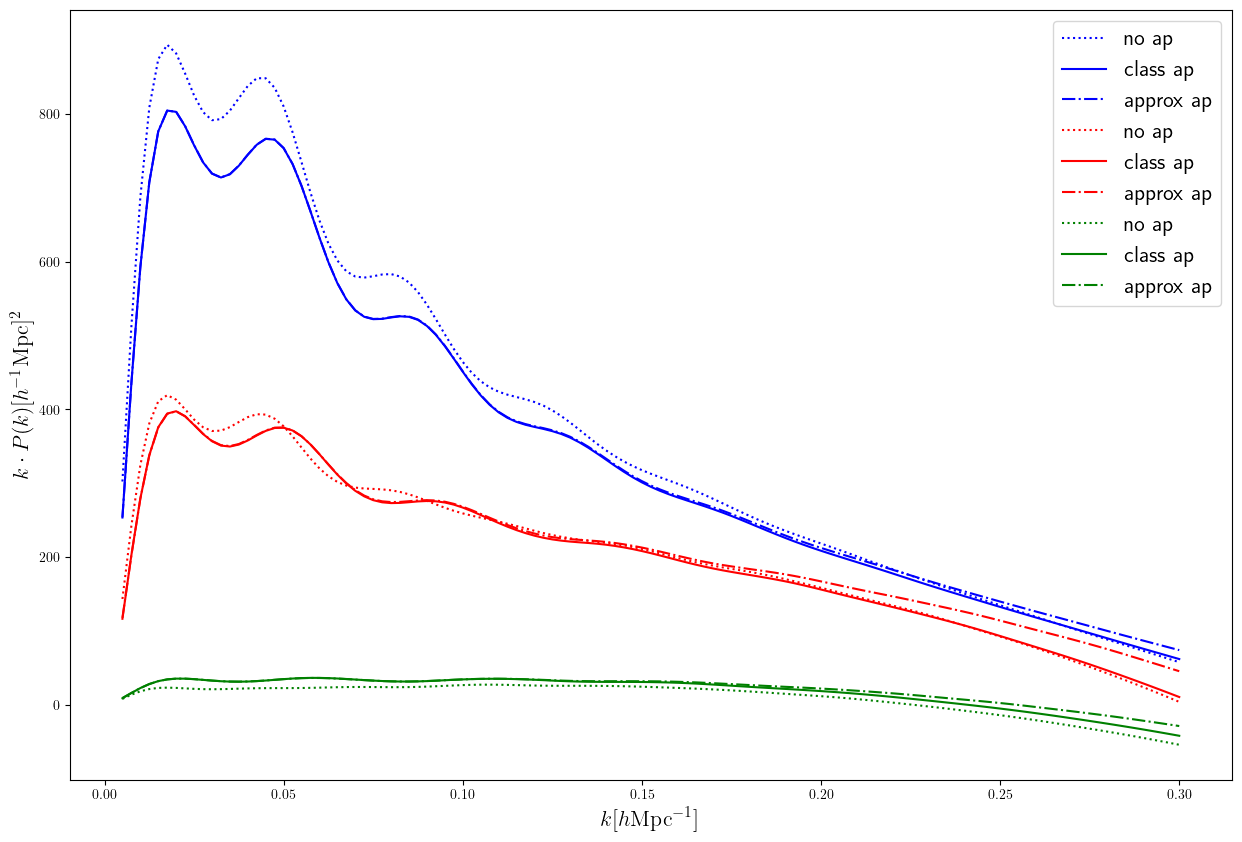

In [101]:
for i in [0,2,4]:
    plt.plot(k, k*pknoap[i], label='no ap', color=color[i], linestyle=':')
    plt.plot(k, k*pkclass[i], label='class ap', color=color[i])
    plt.plot(k, k*pkap[i][3], label='approx ap', color=color[i], linestyle='-.')
plt.legend(fontsize=16)
plt.xlabel(r'$k[h\mathrm{Mpc}^{-1}]$', fontsize=16)
plt.ylabel(r'$k\cdot P(k)[h^{-1}\mathrm{Mpc}]^2$', fontsize=16)

Text(0, 0.5, '$(P_{approx}-P_{class})/\\sigma_{cb}$')

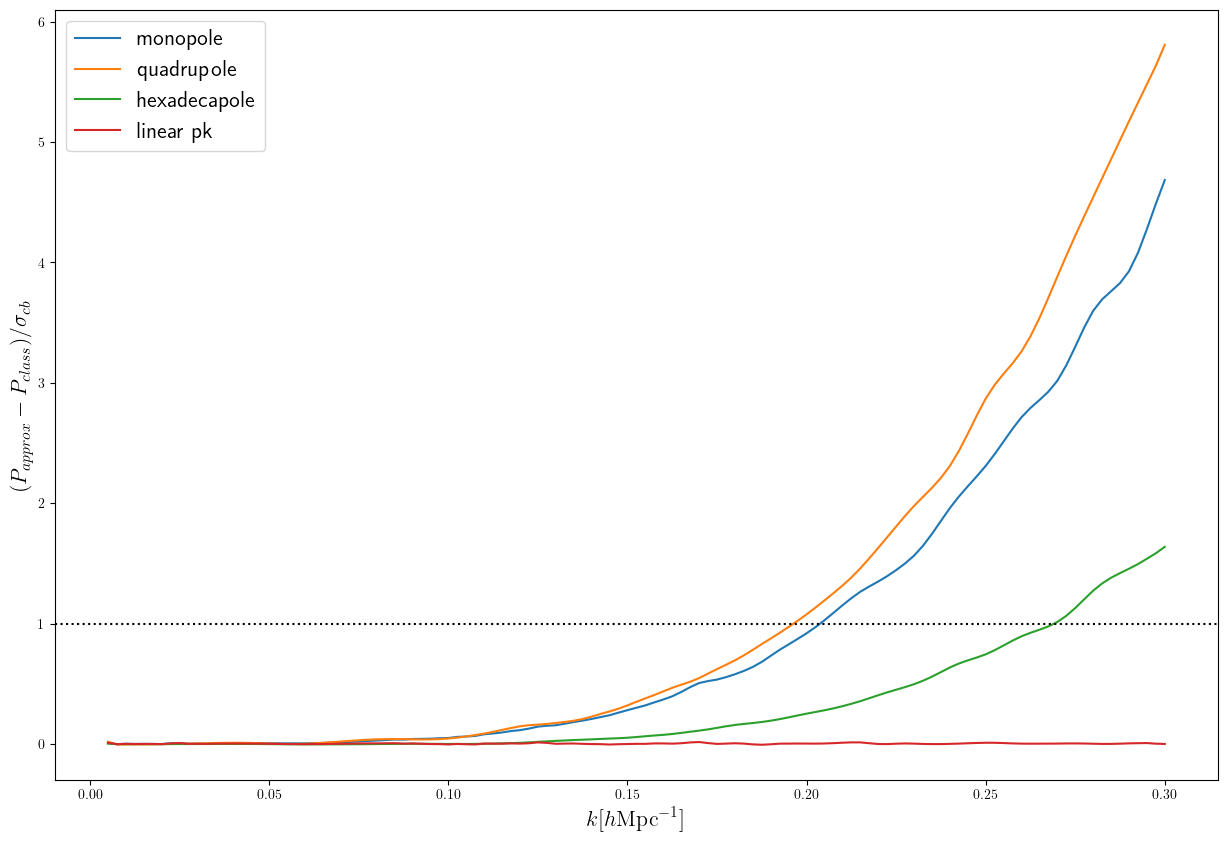

In [102]:
plt.plot(k, (pkap[0][3]-pkclass[0])/std_pk0, label='monopole')
plt.plot(k, (pkap[2][3]-pkclass[2])/std_pk2, label='quadrupole')
plt.plot(k, (pkap[4][3]-pkclass[4])/std_pk4, label='hexadecapole')
plt.plot(k, (pkap_lin[0][3]-pkclass_lin[0])/std_pk0, label='linear pk')
plt.axhline(1, color='k', linestyle=':')
plt.legend(fontsize=16)
plt.xlabel(r'$k[h\mathrm{Mpc}^{-1}]$', fontsize=16)
plt.ylabel(r'$(P_{approx}-P_{class})/\sigma_{cb}$', fontsize=16)

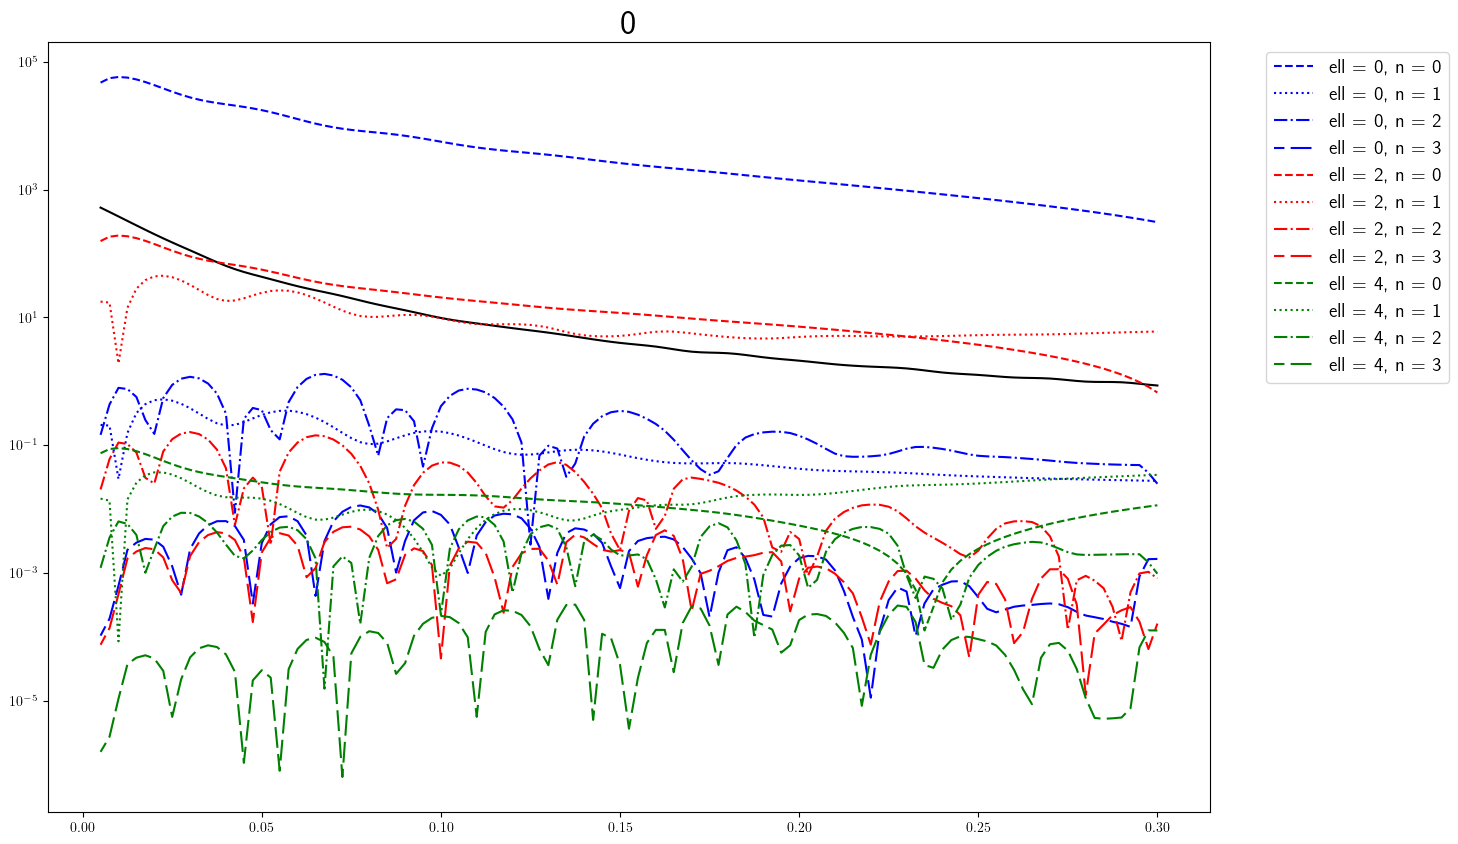

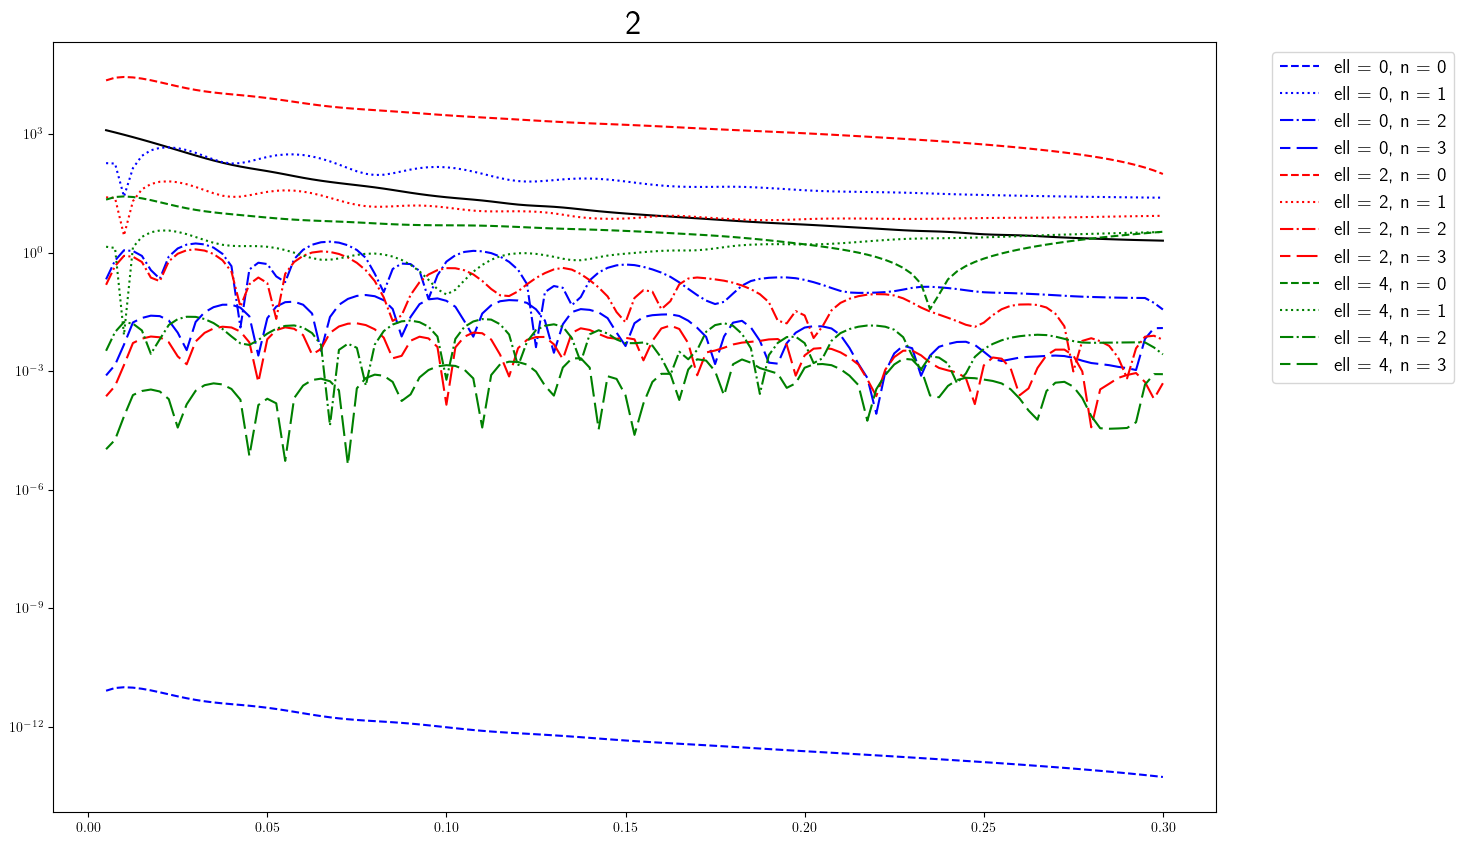

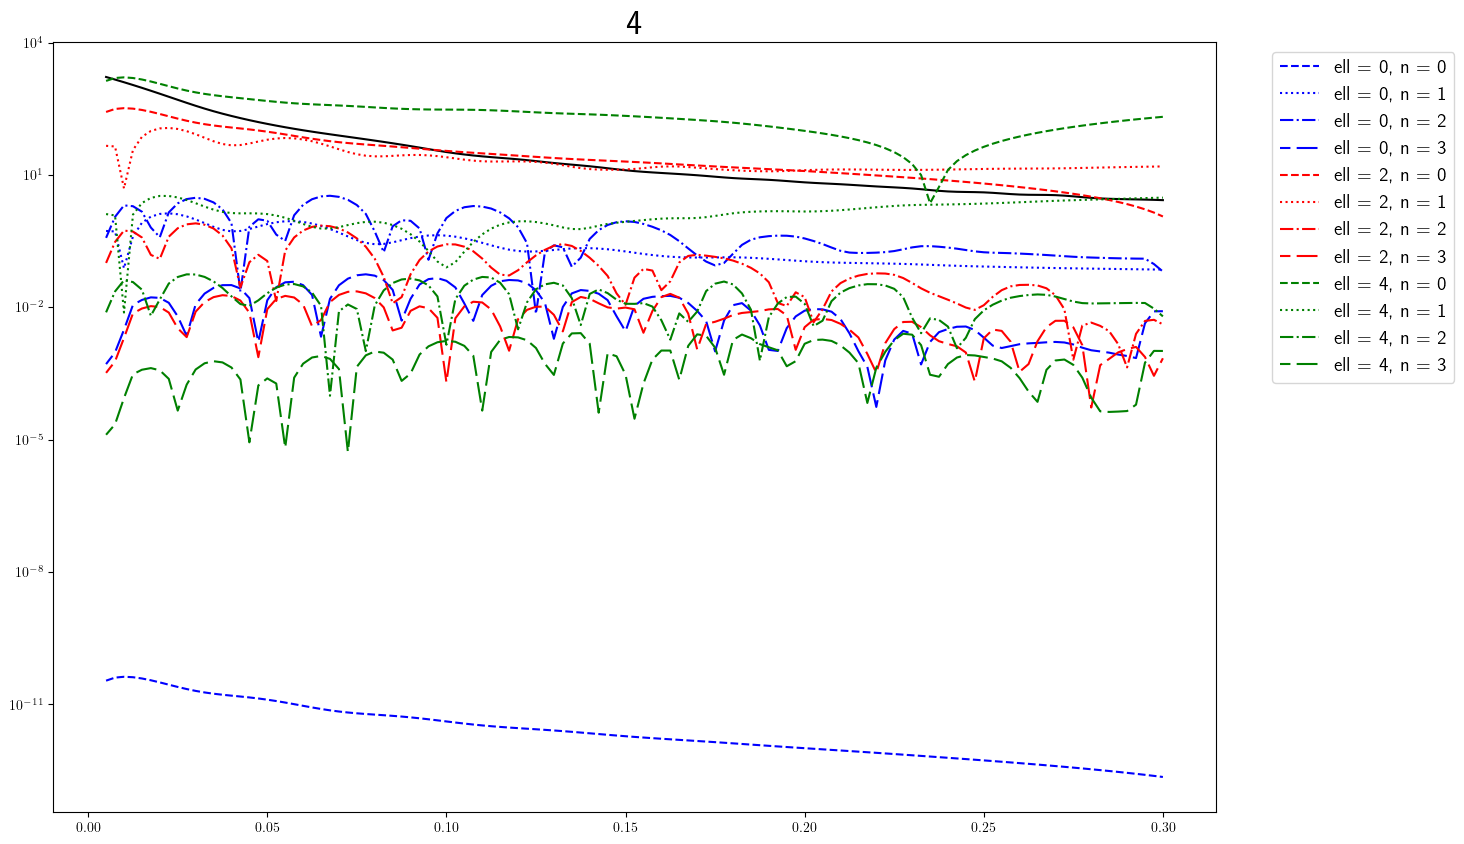

In [86]:
line = ['dashed', 'dotted','dashdot',(5, (10, 3))]
color = {0:'b', 2:'r', 4:'g'}
std = {0:std_pk0, 2:std_pk2, 4:std_pk4}

for ell in [0,2,4]:
    plt.plot(k, std[ell]/10, color='k')
    for ell_dash in [0,2,4]:
        for n in [0,1,2,3]:
            plt.plot(k,np.abs(pkindiv[ell][ell_dash][n]), label = f'ell = {ell_dash}, n = {n}', color= color[ell_dash],
                     linestyle=line[n])
            #if ell_dash==ell and n==0: plt.plot(k,np.abs(pkindiv[ell][ell_dash][n])/1000, color= 'k')
    plt.yscale('log')
    plt.legend(fontsize=14, loc='best', title_fontsize='16', bbox_to_anchor=(1.04,1))
    plt.title(ell,fontsize=25)
    plt.show()

In [23]:
k = np.arange(.005,.3025,0.0025)
output_parameters = (k, z, 119)

b1 = 2
b2 = 0
bG2 = 0
bGamma3 = 0
b4 = 0
c0 = 0
Pshot = 0

# Initialize outputs
c.initialize_output(*output_parameters)
cclass.initialize_output(*output_parameters)

# Calculate pkfid and pkclass
pknoap = {}
pkclass = {}
for ell in [0, 2, 4]:
    if ell == 0:
        pknoap[ell] = c.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
        pkclass[ell] = cclass.pk_gg_l0(b1, b2, bG2, bGamma3, c0,Pshot, b4)
    elif ell == 2:
        pknoap[ell] = c.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
        pkclass[ell] = cclass.pk_gg_l2(b1, b2, bG2, bGamma3, c0, b4)
    elif ell == 4:
        pknoap[ell] = c.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)
        pkclass[ell] = cclass.pk_gg_l4(b1, b2, bG2, bGamma3, c0, b4)

In [24]:
pkap = {}
pkindiv = {}
kp = k_prime(k, apar, aperp)

for ell in [0, 2, 4]:
    pkap[ell] = {m: np.zeros((len(kp))) for m in [0, 1, 2, 3]}
    pkindiv[ell] = {}
    
    for ell_dash in [0, 2, 4]:
        pkindiv[ell][ell_dash] = {m: np.zeros((len(kp))) for m in [0, 1, 2, 3]}
        f_pk = interpolate.interp1d(k, pknoap[ell_dash], fill_value="extrapolate", kind="cubic")
        
        for n in [0, 1, 2, 3]:
            pktmp = f_pk(kp)
            pd = calculate_pd(n, pktmp, kp)
            pkindiv[ell][ell_dash][n] = calculate_pk(ell, ell_dash, n, a, eps, pd, kp)
            
            for m in [0, 1, 2, 3]:
                if n <= m:
                    pkap[ell][m] += calculate_pk(ell, ell_dash, n, a, eps, pd, kp)

for ell in [0, 2, 4]:
    for n in [0, 1, 2, 3]:
        pkap[ell][n] /= (aperp**2*apar)
        for ell_dash in [0, 2, 4]:
            pkindiv[ell][ell_dash][n] /= (aperp**2*apar)

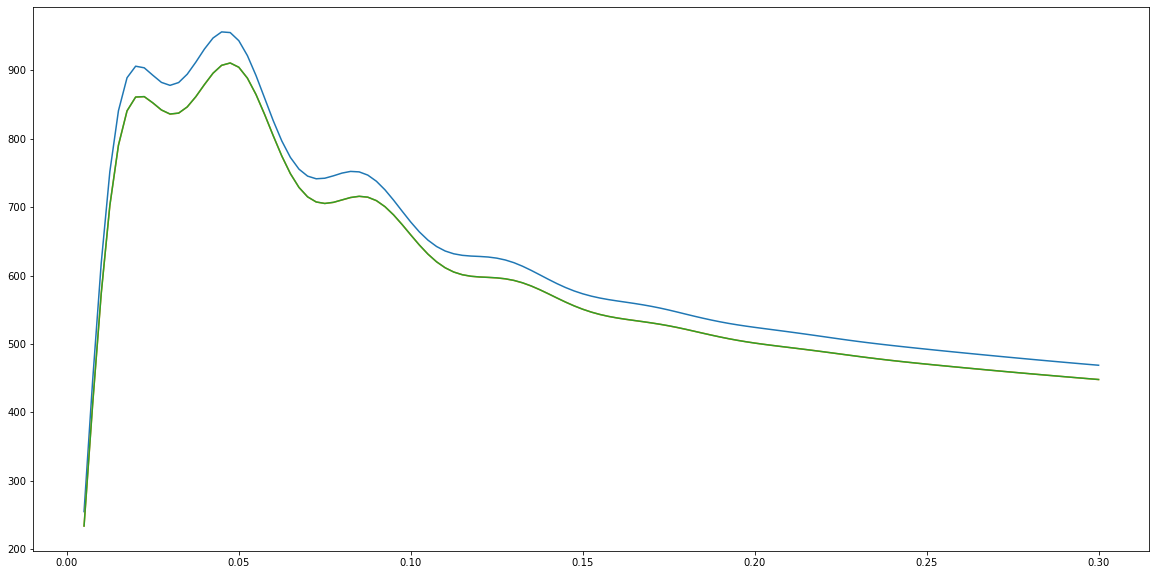

In [25]:
plt.plot(k, k*pknoap[0], label='np ap')
plt.plot(k, k*pkclass[0], label='class ap')
plt.plot(k, k*pkap[0][3], label='approx ap')

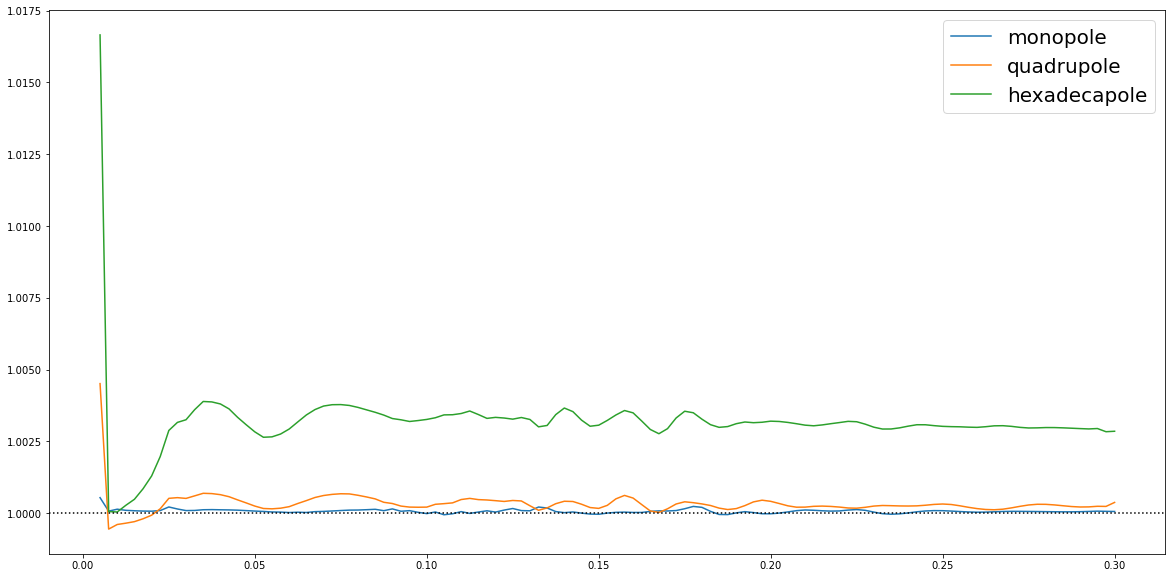

In [26]:
plt.plot(k, pkap[0][3]/pkclass[0], label='monopole')
plt.plot(k, pkap[2][3]/pkclass[2], label='quadrupole')
plt.plot(k, pkap[4][3]/pkclass[4], label='hexadecapole')
plt.axhline(1, color='k', linestyle=':')
plt.legend(fontsize=20)